# Getting to know your data

Author: Abel Stanley

NIM: 13517068

## Dataset reading

In [119]:
import pandas as pd
# start: py -m notebook

# read csv file into 'df' dataframe
df = pd.read_csv('./data.csv', sep = ",")

# print some data rows
df.head()

fage  mage       mature  weeks     premie  visits  marital  gained  weight  \
0   NaN    13  younger mom   39.0  full term    10.0  married    38.0    7.63   
1   NaN    14  younger mom   42.0  full term    15.0  married    20.0    7.88   
2  19.0    15  younger mom   37.0  full term    11.0  married    38.0    6.63   
3  21.0    15  younger mom   41.0  full term     6.0  married    34.0    8.00   
4   NaN    15  younger mom   39.0  full term     9.0  married    27.0    6.38   

  lowbirthweight  gender      habit   whitemom  
0        not low    male  nonsmoker  not white  
1        not low    male  nonsmoker  not white  
2        not low  female  nonsmoker      white  
3        not low    male  nonsmoker      white  
4        not low  female  nonsmoker  not white

## Data description

How many rows?

In [120]:
len1 = len(df)
print(len1)

1000


Data summary: (numerical features only)

In [121]:
df.describe()

fage         mage       weeks      visits      gained      weight
count  829.000000  1000.000000  998.000000  991.000000  973.000000  1000.00000
mean    30.255730    27.000000   38.334669   12.104945   30.325797     7.10100
std      6.763766     6.213583    2.931553    3.954934   14.241297     1.50886
min     14.000000    13.000000   20.000000    0.000000    0.000000     1.00000
25%     25.000000    22.000000   37.000000   10.000000   20.000000     6.38000
50%     30.000000    27.000000   39.000000   12.000000   30.000000     7.31000
75%     35.000000    32.000000   40.000000   15.000000   38.000000     8.06000
max     55.000000    50.000000   45.000000   30.000000   85.000000    11.75000

Variance

In [122]:
df.var()

fage       45.748533
mage       38.608609
weeks       8.594002
visits     15.641501
gained    202.814529
weight      2.276659
dtype: float64

## Data preparation

### 1. Missing values handling

#### Locate columns with missing values

In [123]:
#### Locate columns with missing valuesdf.columns[df.isnull().any()]

#### Missing values percentage per columns

In [124]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
    
missing(df)

fage              17.1
gained             2.7
visits             0.9
whitemom           0.2
premie             0.2
weeks              0.2
habit              0.1
marital            0.1
gender             0.0
lowbirthweight     0.0
weight             0.0
mature             0.0
mage               0.0
dtype: float64


Because missing value percentage in fage is quite significant, it is a lot safer to drop them whereas the others we can still safely replace/impute them.

#### Handling

##### Drop rows with missing values

In [125]:
# Drop rows with missing values in fage column
df.dropna(axis=0, # delete row 
            how='any', # if one of them is missing, drop
            subset=['fage'], #columns to be deleted
            inplace= True)
print("Dropped missing value rows =", len1 - len(df))
print()
print("Missing value Percentage:")
missing(df)



Dropped missing value rows = 171

Missing value Percentage:
gained            2.29
visits            0.84
whitemom          0.24
premie            0.12
weeks             0.12
habit             0.00
gender            0.00
lowbirthweight    0.00
weight            0.00
marital           0.00
mature            0.00
mage              0.00
fage              0.00
dtype: float64


###### Impute rows with missing values

In [126]:
# Impute the rest rows with missing values:
# Impute numerical columns with mean
df = df.fillna(value=df.mean(numeric_only=True))
# Impute categorical columns with mode (most frequent value)
df = df.fillna(df.mode().iloc[0])
print("Missing value Percentage:")
missing(df)

Missing value Percentage:
whitemom          0.0
habit             0.0
gender            0.0
lowbirthweight    0.0
weight            0.0
gained            0.0
marital           0.0
visits            0.0
premie            0.0
weeks             0.0
mature            0.0
mage              0.0
fage              0.0
dtype: float64


Thus, the data is now clean of missing values.

### 2. Remove Outliers

In [127]:
import numpy as np

###### Locate outliers:

In [128]:
def CountOutliers(df, k):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    for col_name in numerical_cols:
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3-Q1
        outlier_floor = Q1 - k * IQR
        outlier_ceil = Q3 + k * IQR
        print(col_name, "has ", ((df[col_name] < outlier_floor) | (df[col_name] > outlier_ceil)).sum(), "outliers!")

CountOutliers(df, 1.5)

fage has  2 outliers!
mage has  1 outliers!
weeks has  68 outliers!
visits has  16 outliers!
gained has  17 outliers!
weight has  33 outliers!


###### Remove outliers:

In [129]:
# Outlier removal with ICR:
def RemoveOutliers(df, k):
    len1 = len(df)
    numerical_cols = df.select_dtypes(include=np.number)
    for col_name in numerical_cols:
        print("Removing Outliers for ", col_name)
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3-Q1
        outlier_floor = Q1 - k * IQR
        outlier_ceil = Q3 + k * IQR
        print("k:", k)
        print("Q1:", Q1)
        print("Q3:", Q3)
        print("IQR:", IQR)
        print("(𝑄1−𝑘∗𝐼𝑄𝑅):", outlier_floor)
        print("(𝑄3+𝑘∗𝐼𝑄𝑅):", outlier_ceil)
        n_row = len(df)
        df = df.query('@outlier_floor <= {0} <= @outlier_ceil'.format(col_name))
        print("Dropped rows: ", n_row - len(df))
        print()
    
    print("Total rows dropped: ", len1-len(df))
    return df

df = RemoveOutliers(df, 1.5)

Removing Outliers for  fage
k: 1.5
Q1: 25.0
Q3: 35.0
IQR: 10.0
(𝑄1−𝑘∗𝐼𝑄𝑅): 10.0
(𝑄3+𝑘∗𝐼𝑄𝑅): 50.0
Dropped rows:  2

Removing Outliers for  mage
k: 1.5
Q1: 22.0
Q3: 33.0
IQR: 11.0
(𝑄1−𝑘∗𝐼𝑄𝑅): 5.5
(𝑄3+𝑘∗𝐼𝑄𝑅): 49.5
Dropped rows:  1

Removing Outliers for  weeks
k: 1.5
Q1: 38.0
Q3: 40.0
IQR: 2.0
(𝑄1−𝑘∗𝐼𝑄𝑅): 35.0
(𝑄3+𝑘∗𝐼𝑄𝑅): 43.0
Dropped rows:  66

Removing Outliers for  visits
k: 1.5
Q1: 10.0
Q3: 15.0
IQR: 5.0
(𝑄1−𝑘∗𝐼𝑄𝑅): 2.5
(𝑄3+𝑘∗𝐼𝑄𝑅): 22.5
Dropped rows:  14

Removing Outliers for  gained
k: 1.5
Q1: 22.0
Q3: 39.0
IQR: 17.0
(𝑄1−𝑘∗𝐼𝑄𝑅): -3.5
(𝑄3+𝑘∗𝐼𝑄𝑅): 64.5
Dropped rows:  15

Removing Outliers for  weight
k: 1.5
Q1: 6.75
Q3: 8.13
IQR: 1.3800000000000008
(𝑄1−𝑘∗𝐼𝑄𝑅): 4.679999999999999
(𝑄3+𝑘∗𝐼𝑄𝑅): 10.200000000000003
Dropped rows:  13

Total rows dropped:  111


##### Final check

In [130]:
CountOutliers(df, 1.5)

fage has  0 outliers!
mage has  0 outliers!
weeks has  0 outliers!
visits has  0 outliers!
gained has  0 outliers!
weight has  0 outliers!


## Data distribution plots (Histograms)

fage

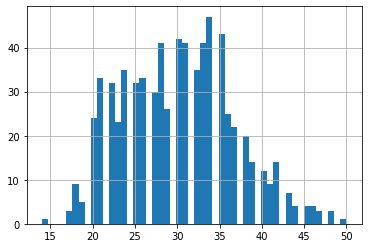

In [131]:
df['fage'].hist(bins=50)

mage

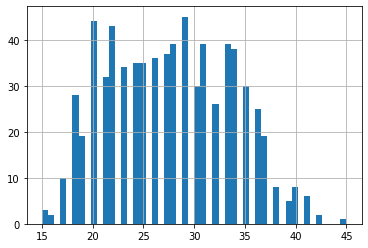

In [132]:
df['mage'].hist(bins=50)

mature

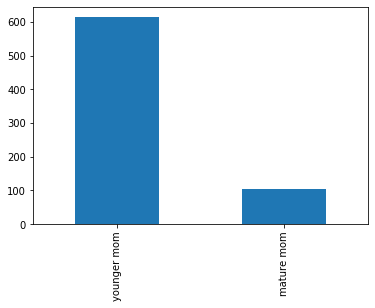

In [133]:
df['mature'].value_counts().plot(kind='bar')

weeks

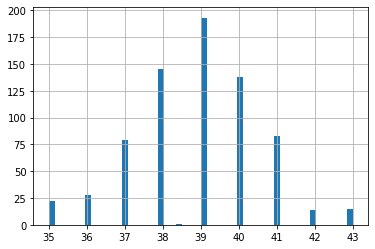

In [134]:
df['weeks'].hist(bins=50)

premie

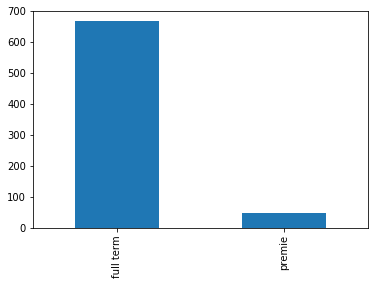

In [135]:
df['premie'].value_counts().plot(kind='bar')

visits

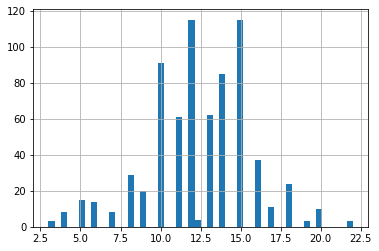

In [136]:
df['visits'].hist(bins=50)

marital

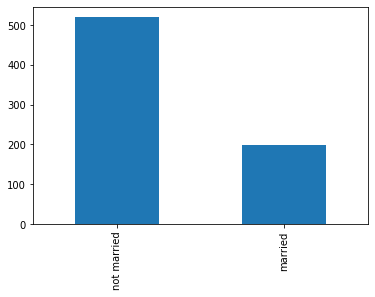

In [137]:
df['marital'].value_counts().plot(kind='bar')

gained

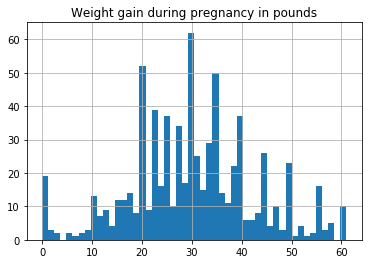

In [138]:
df['gained'].hist(bins=50)
plt.title('Weight gain during pregnancy in pounds')
plt.show()

weight

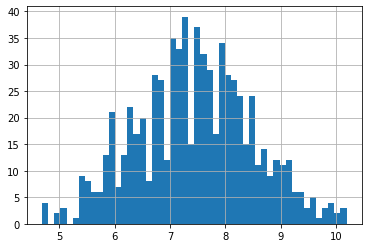

In [139]:
df['weight'].hist(bins=50)

lowbirthweight

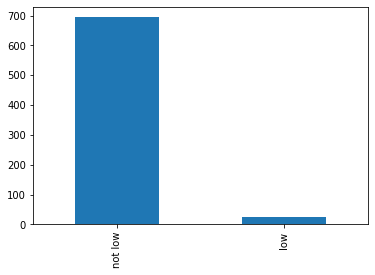

In [140]:
df['lowbirthweight'].value_counts().plot(kind='bar')

gender

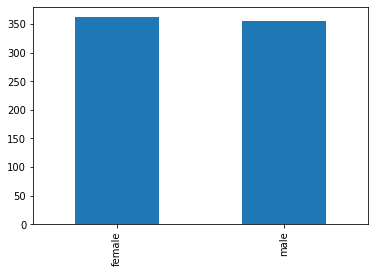

In [141]:
df['gender'].value_counts().plot(kind='bar')

habit

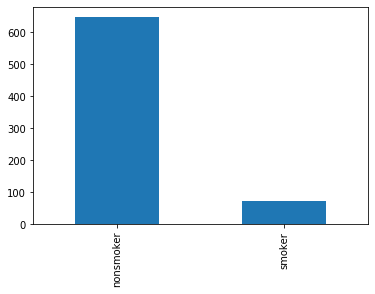

In [142]:
df['habit'].value_counts().plot(kind='bar')

whitemom

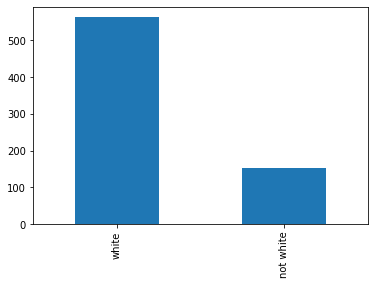

In [143]:
df['whitemom'].value_counts().plot(kind='bar')

## Data Relationship (Boxplots & Scatterplots)

#### prepare library

In [144]:
import seaborn as sns
import matplotlib.pyplot as pltboxplot

#### boxplot of numerical columns

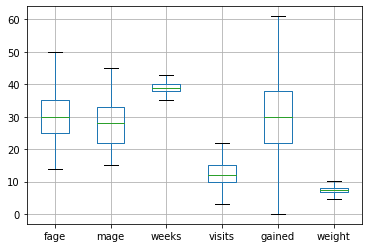

In [145]:
df.boxplot()

#### Relation between Mother's Habit (smoking/not smoking) and Baby's Weight

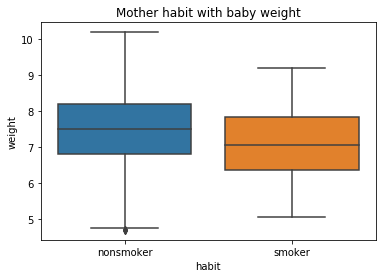

In [146]:
sns.boxplot(x="habit", y="weight", data=df)
plt.title('Mother habit with baby weight')
plt.show()

#### Relation between Mother's Maturity and Baby's Weight

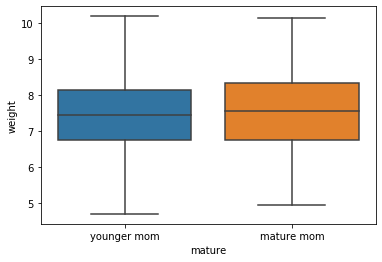

In [147]:
sns.boxplot(x="mature", y="weight", data=df)

#### Box plots for every valid column combination

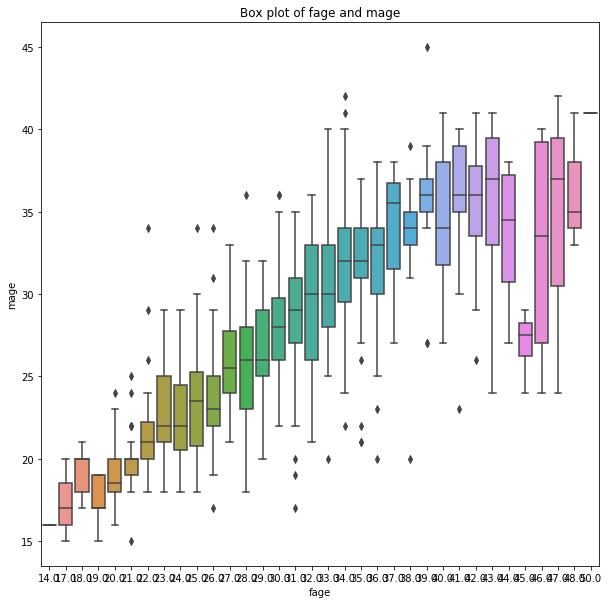

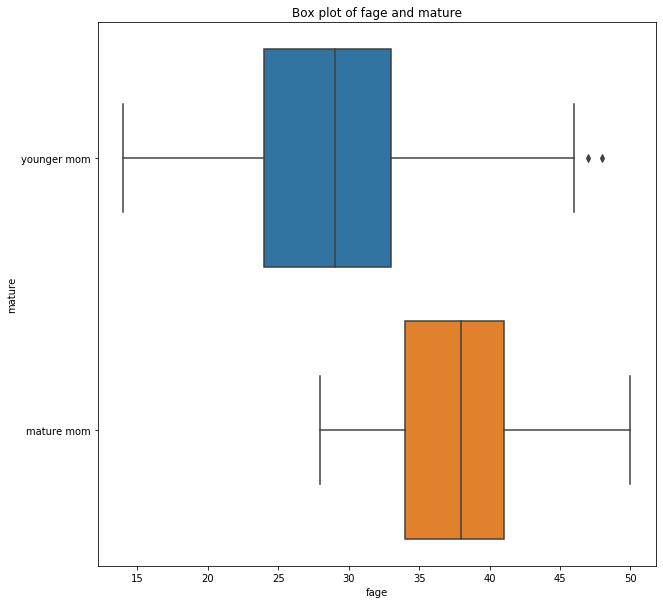

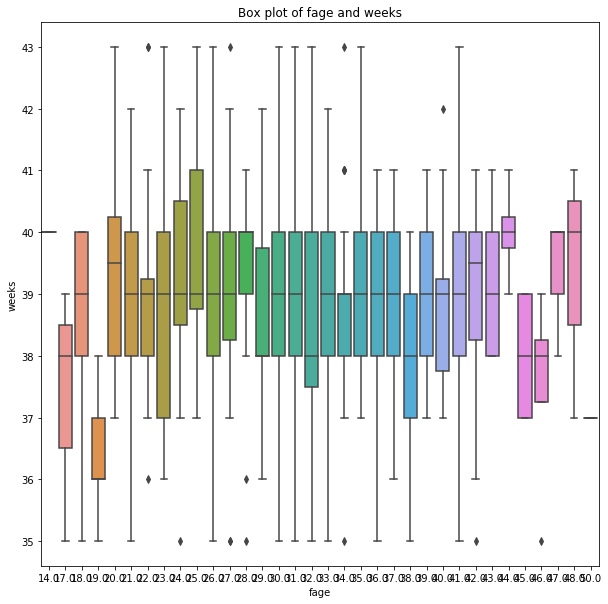

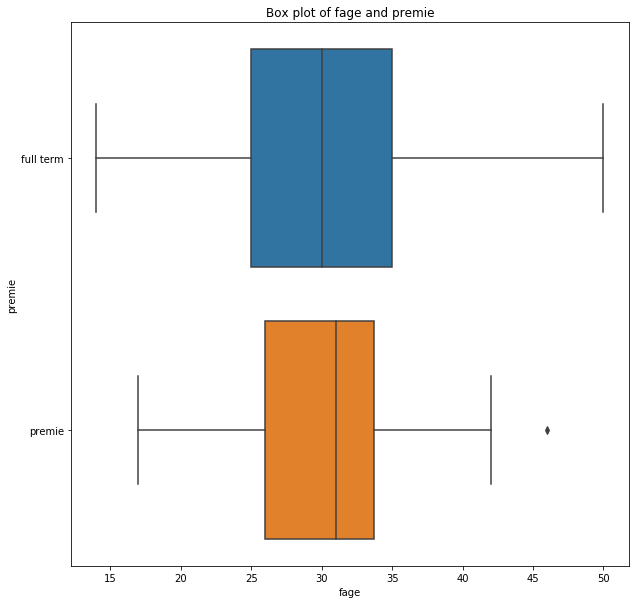

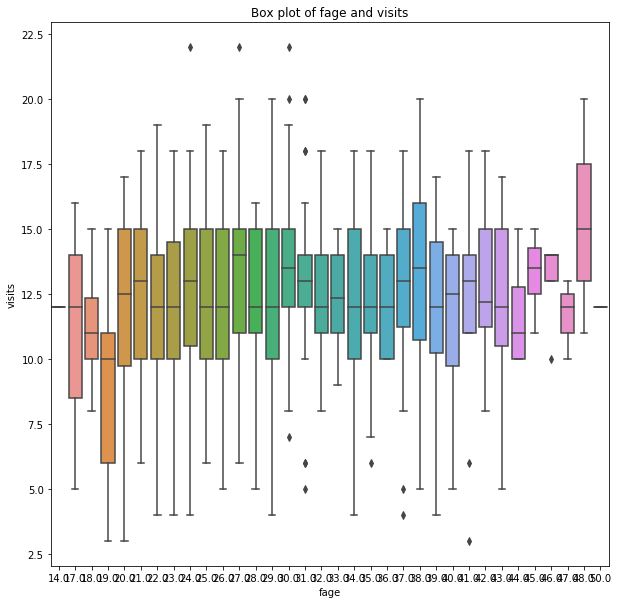

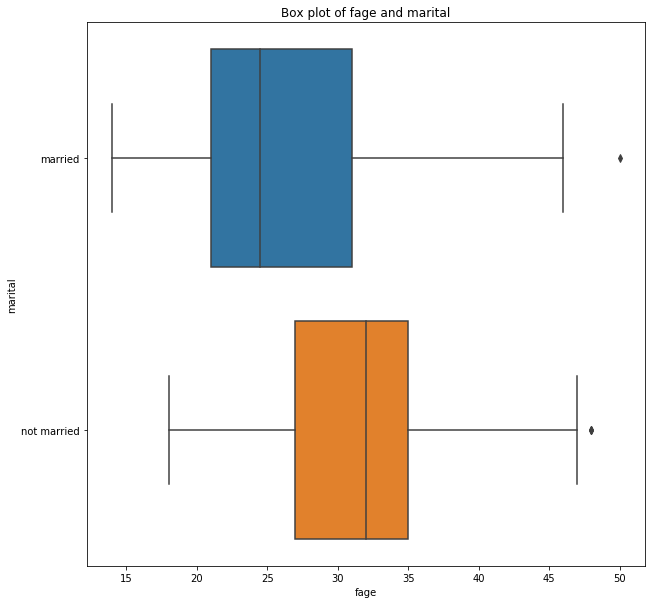

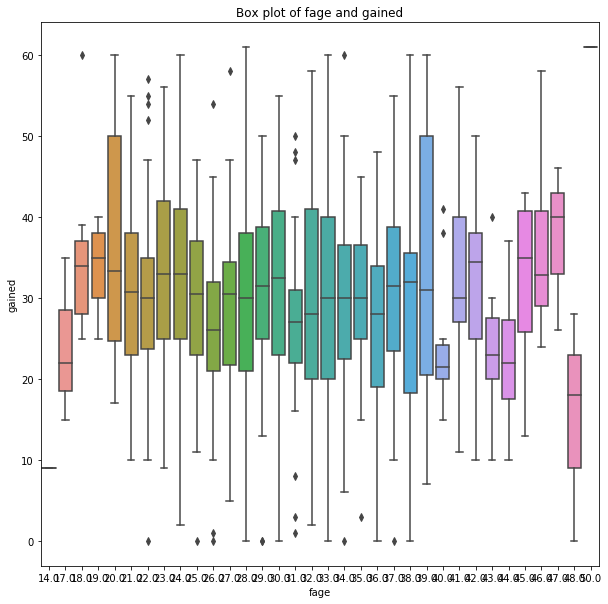

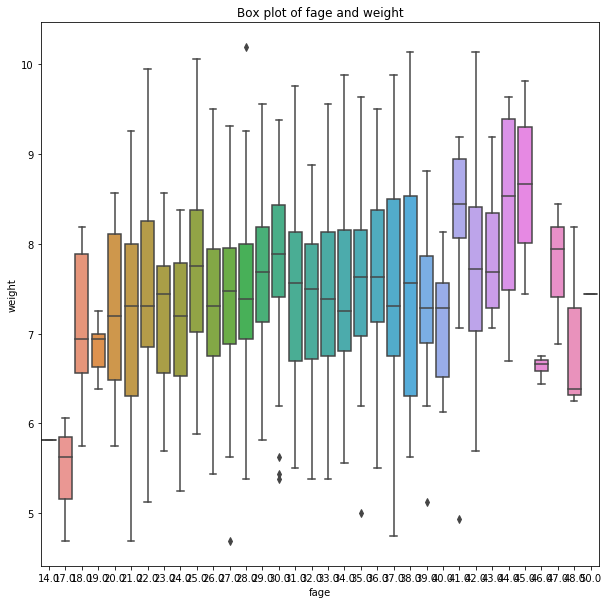

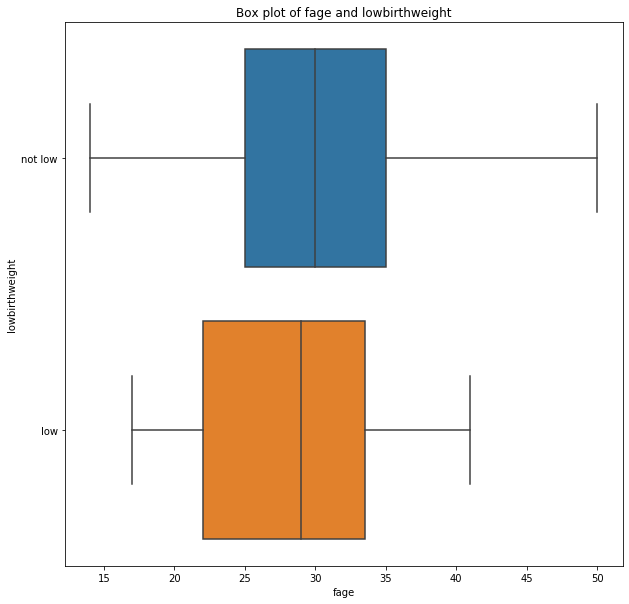

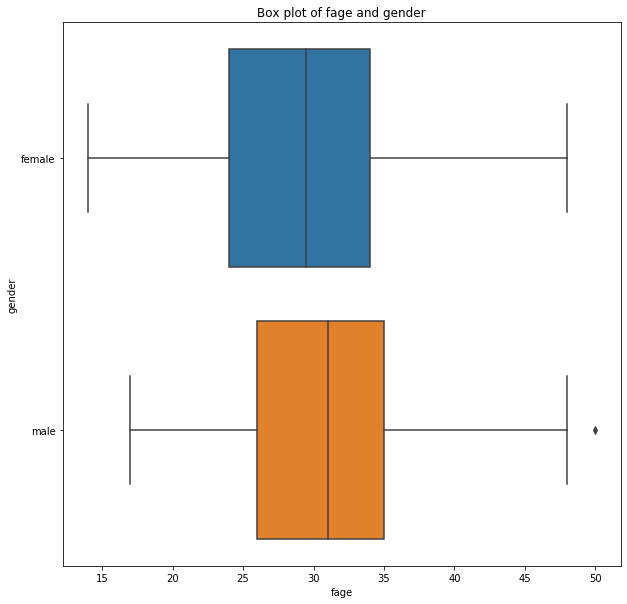

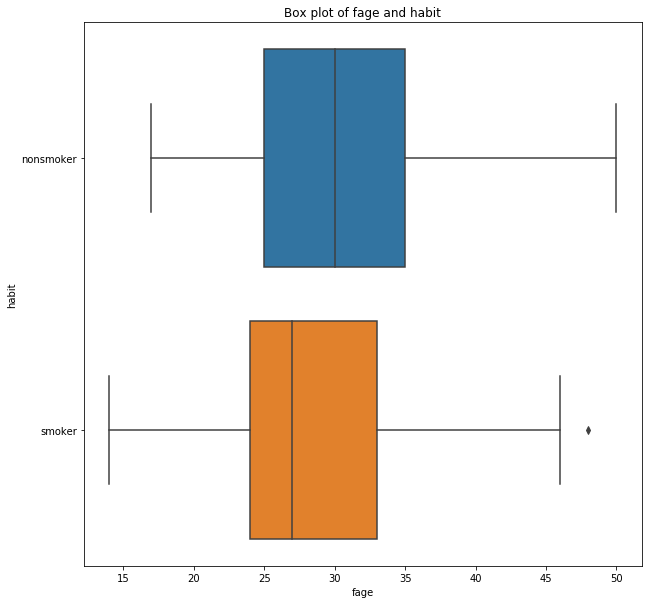

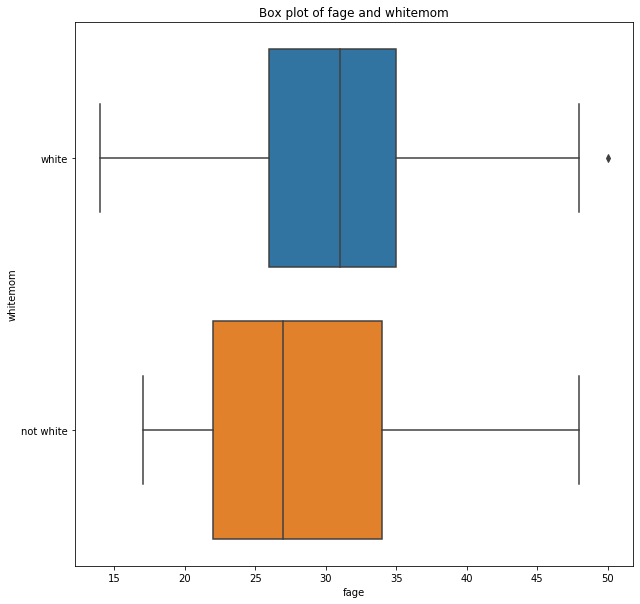

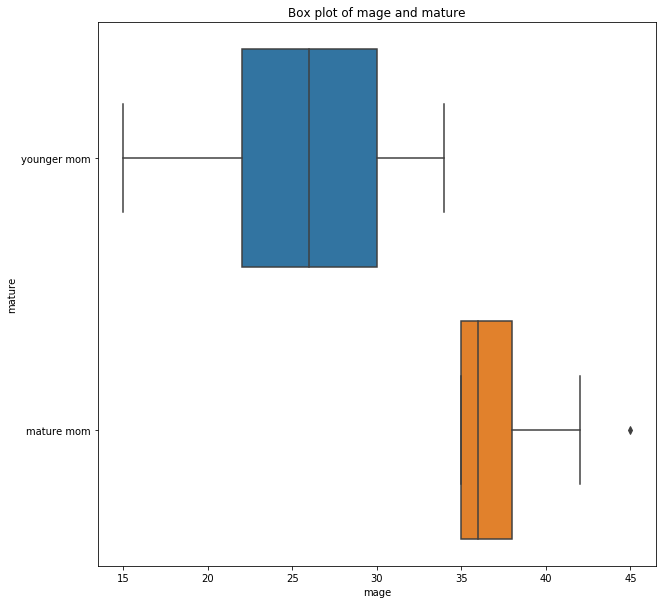

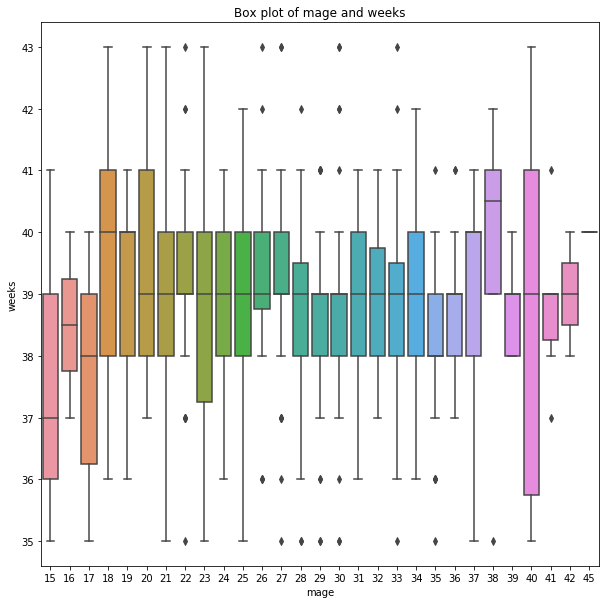

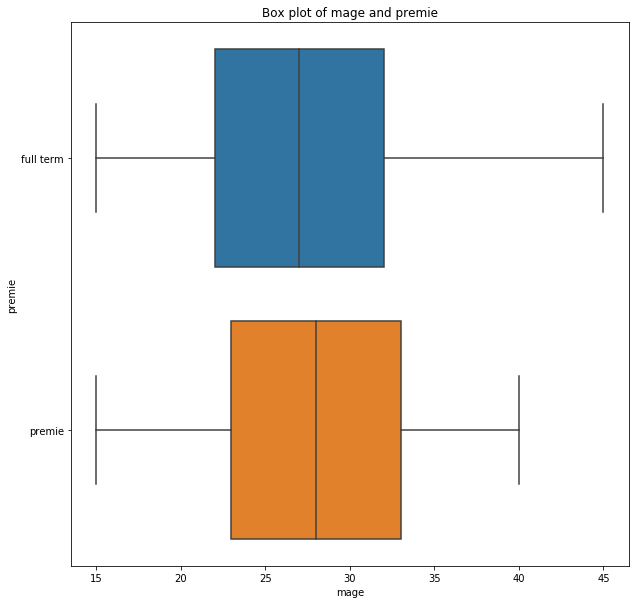

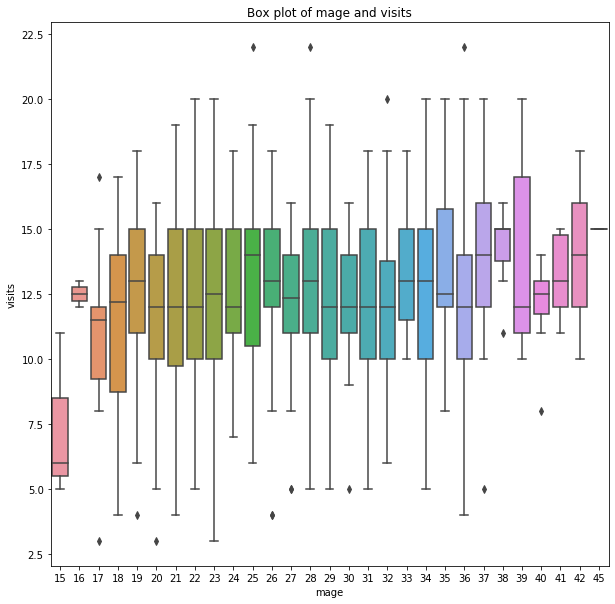

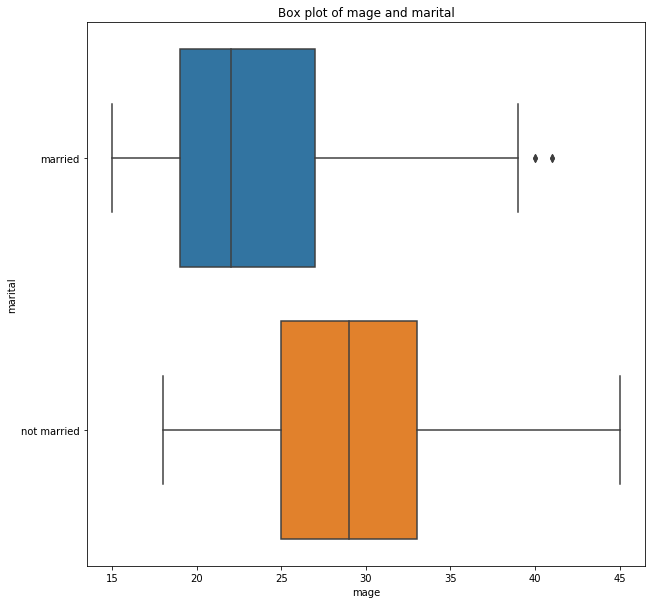

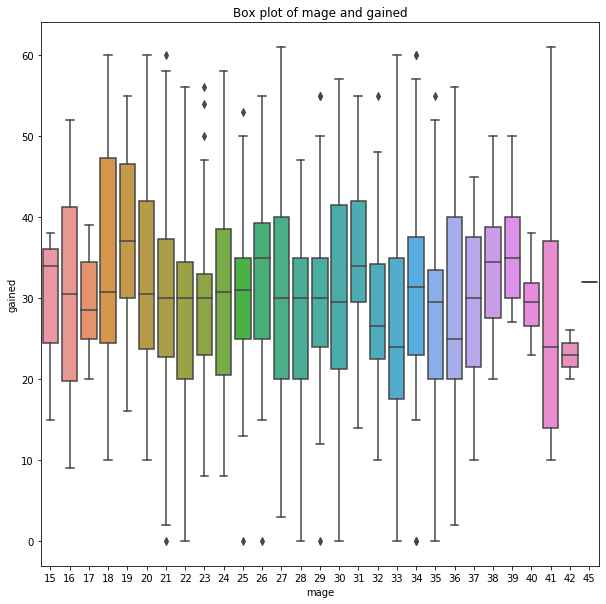

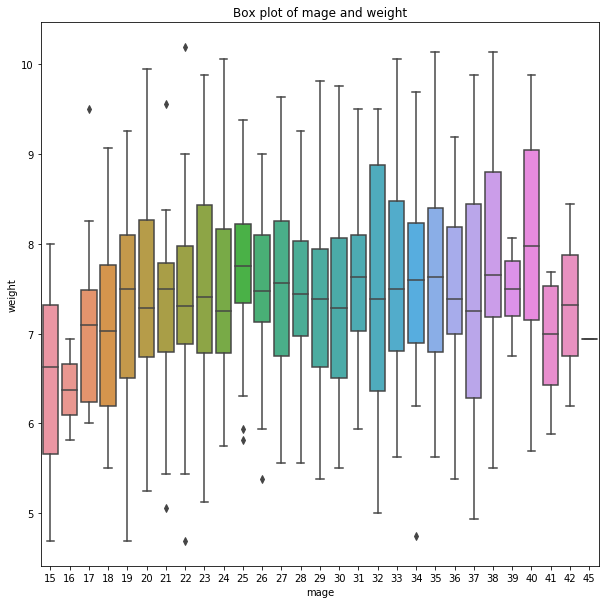

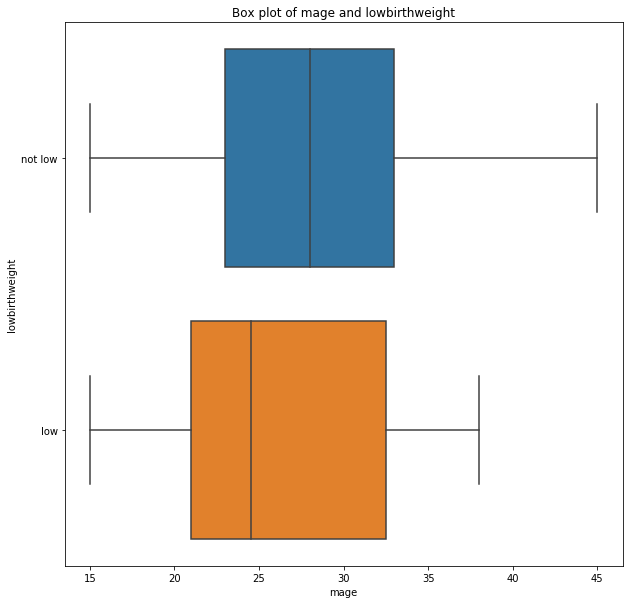

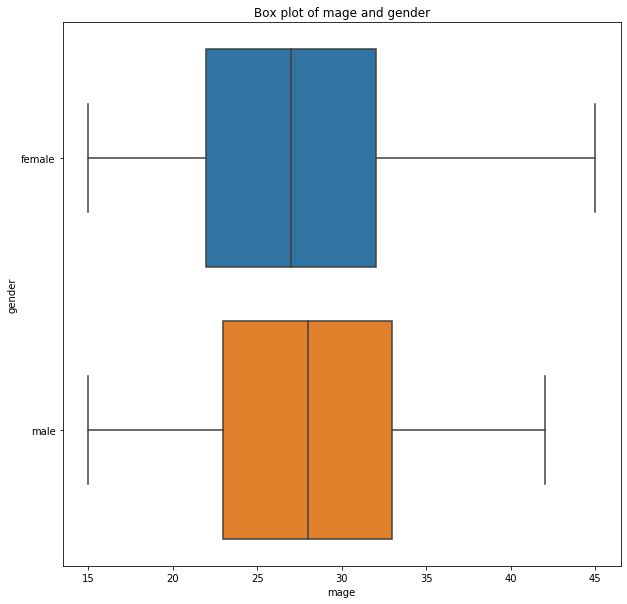

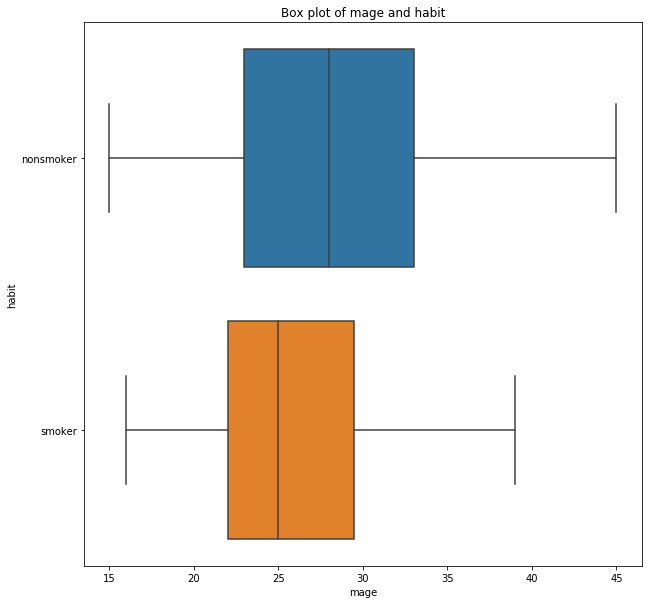

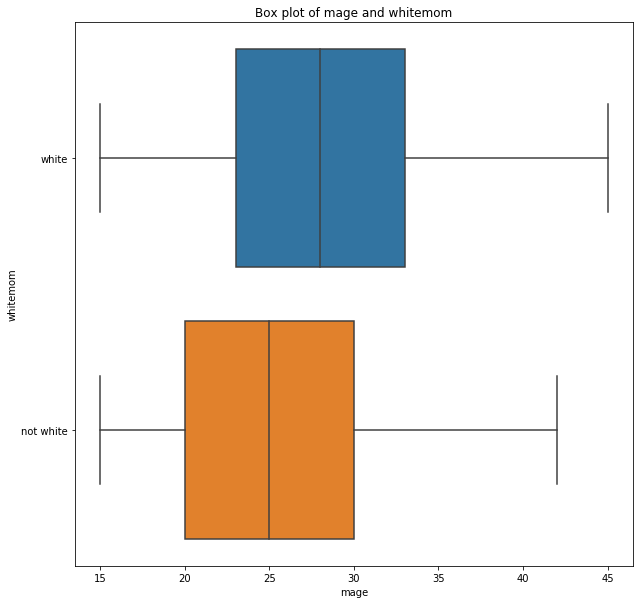

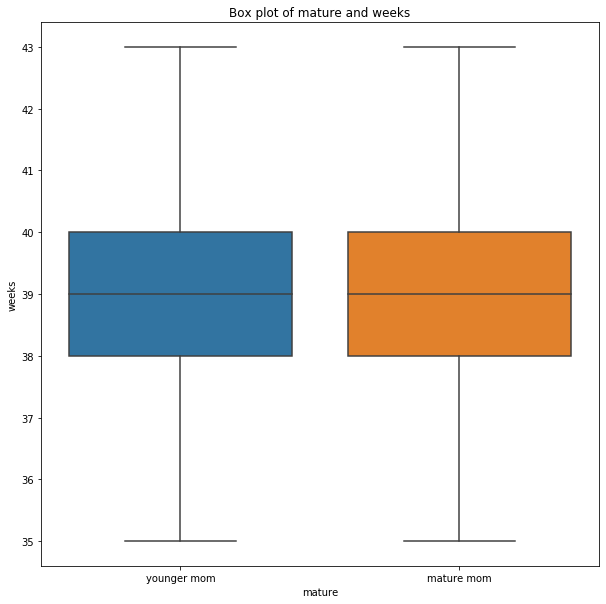

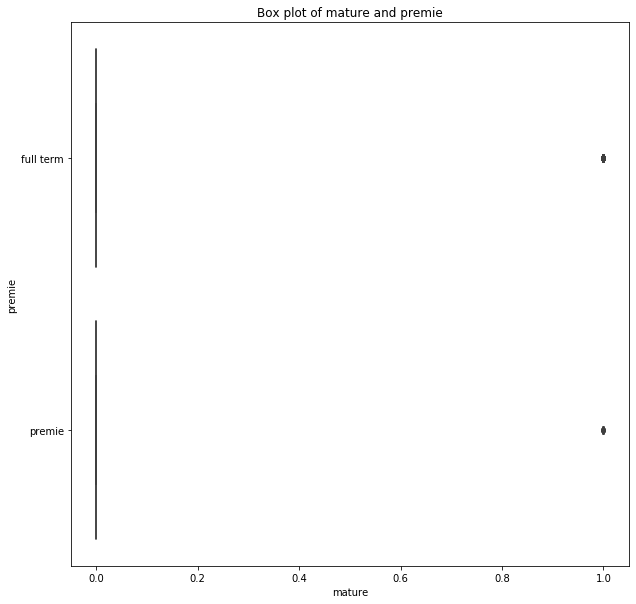

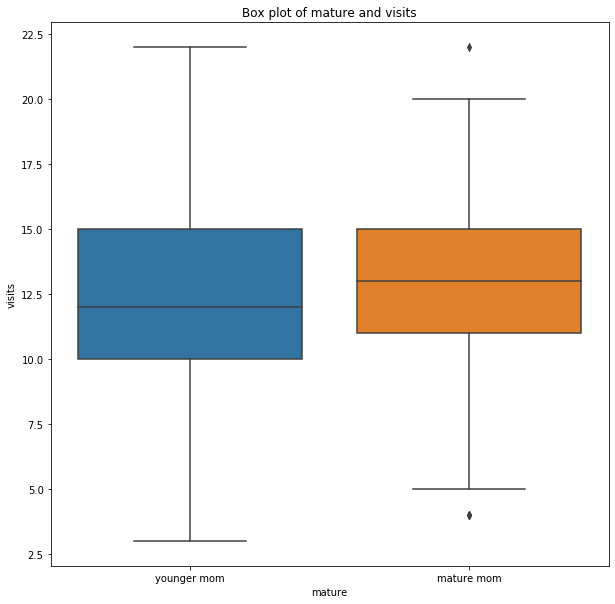

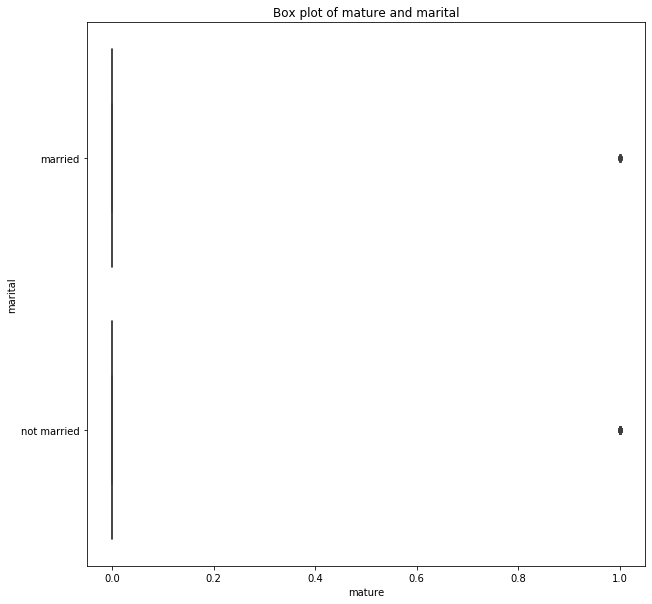

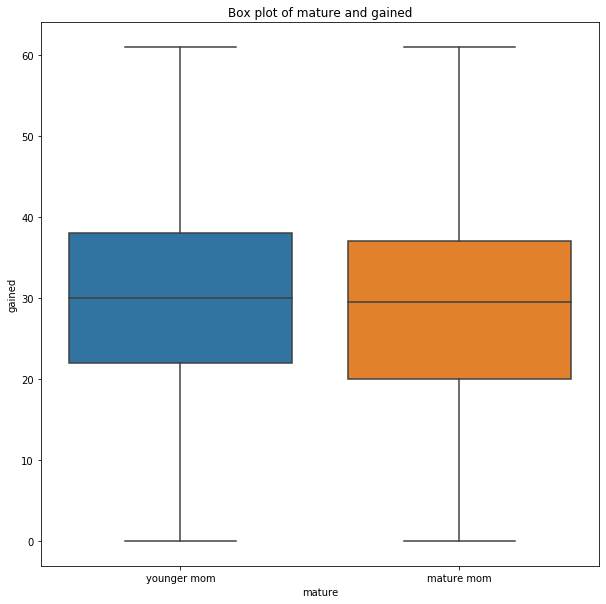

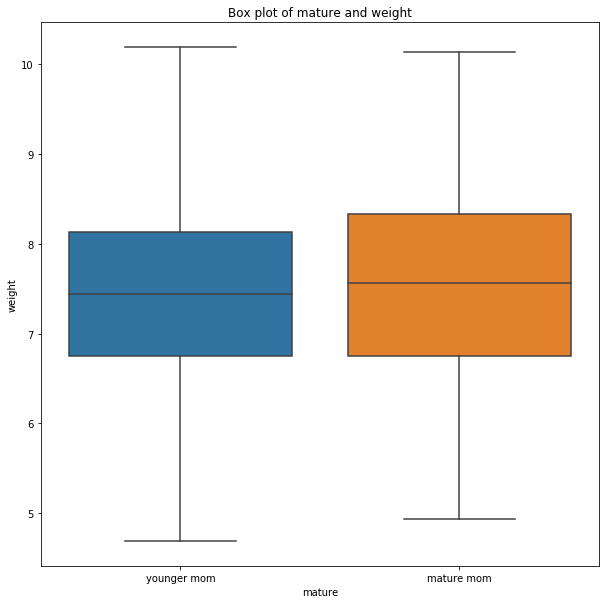

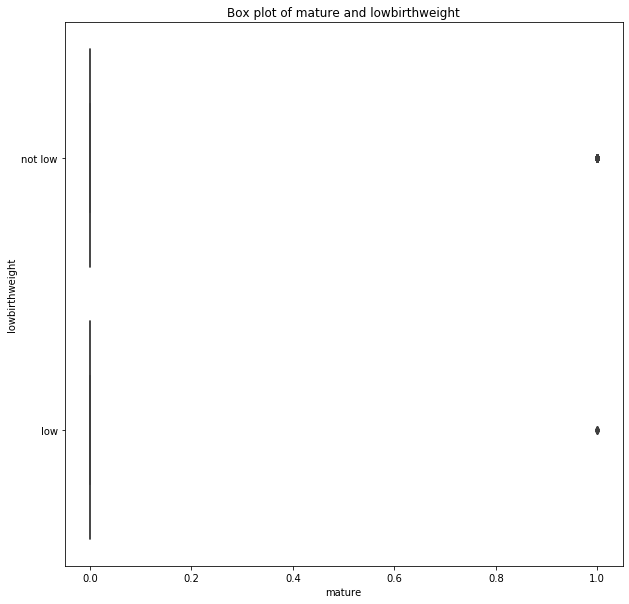

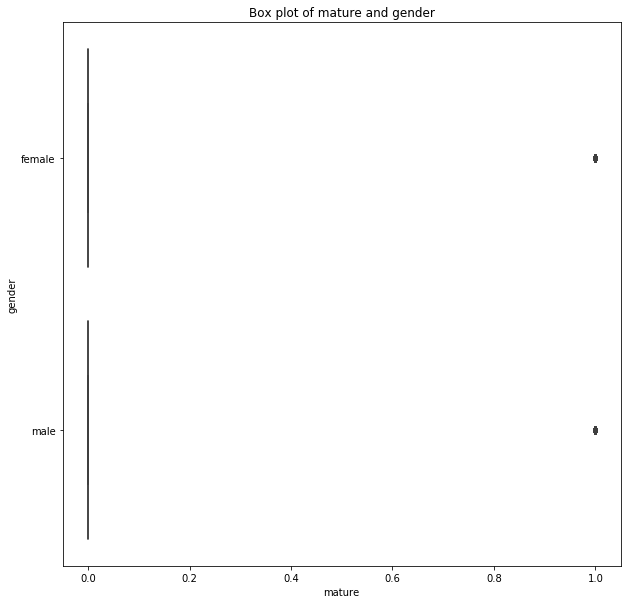

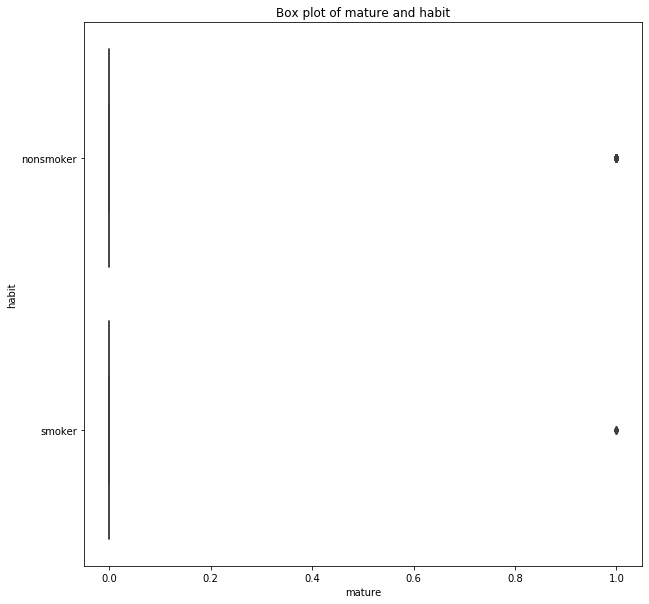

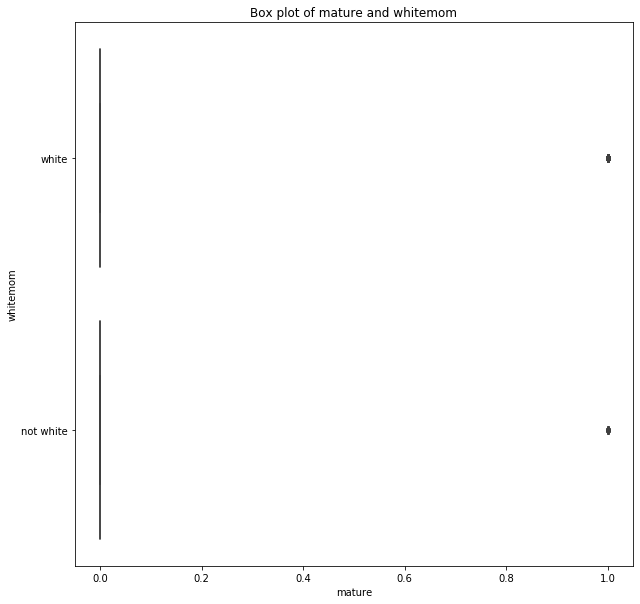

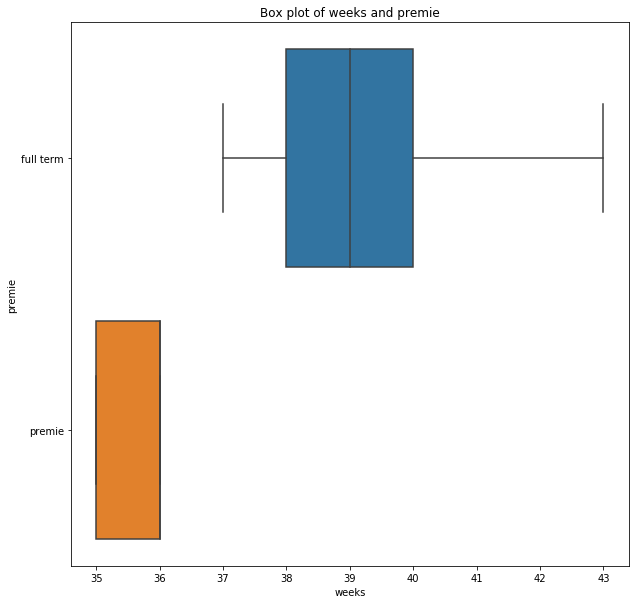

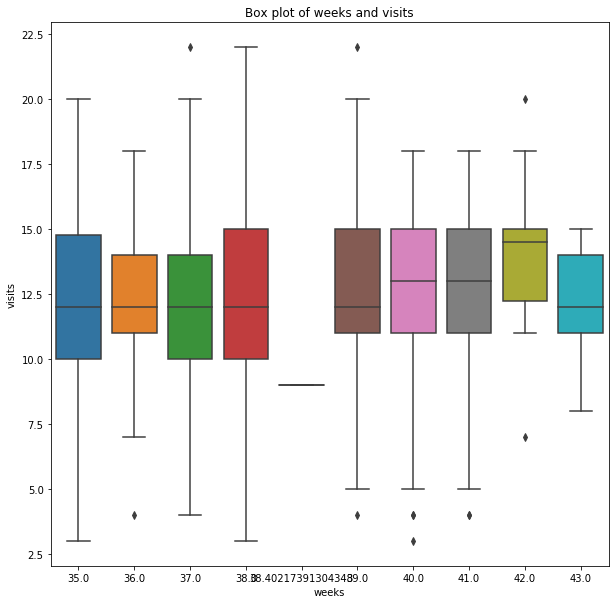

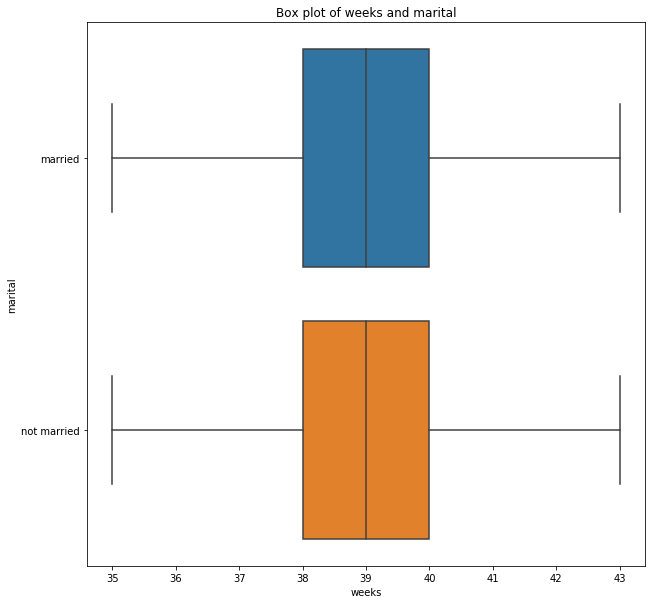

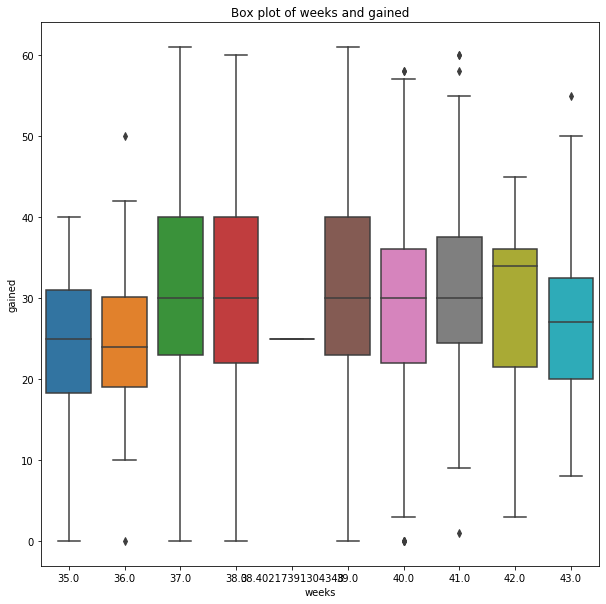

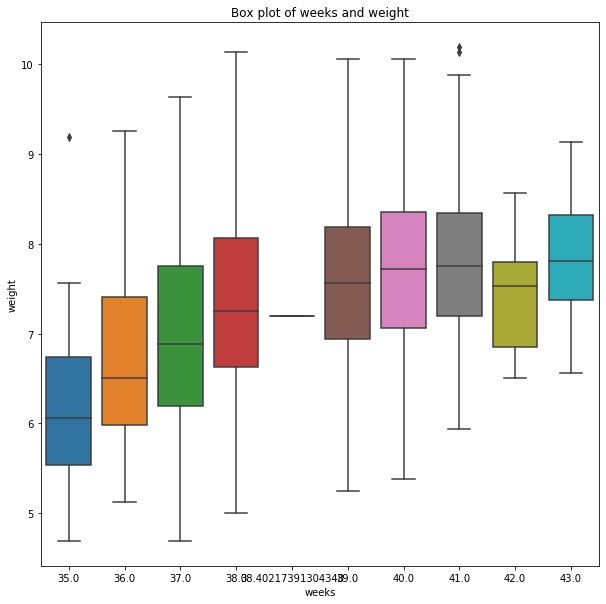

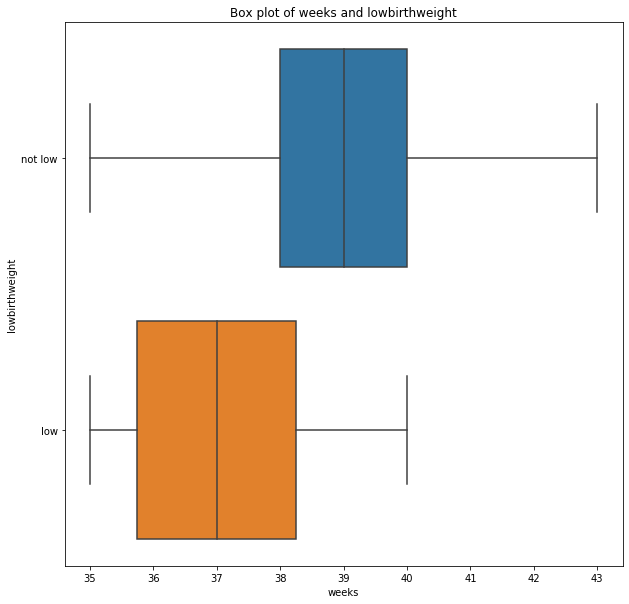

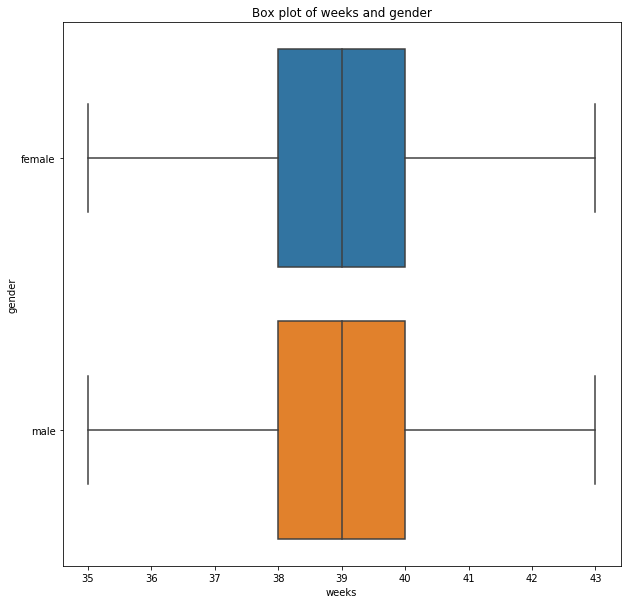

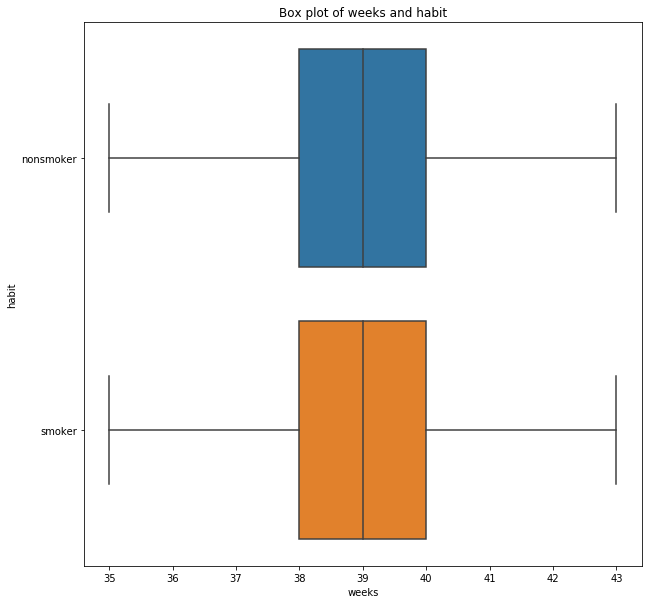

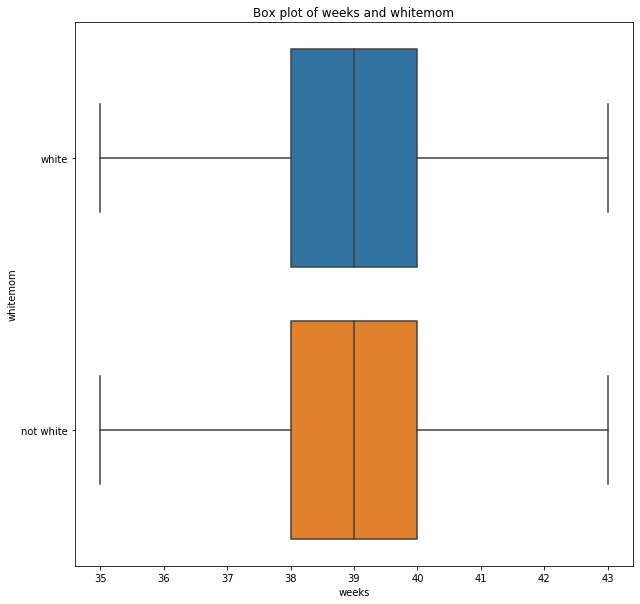

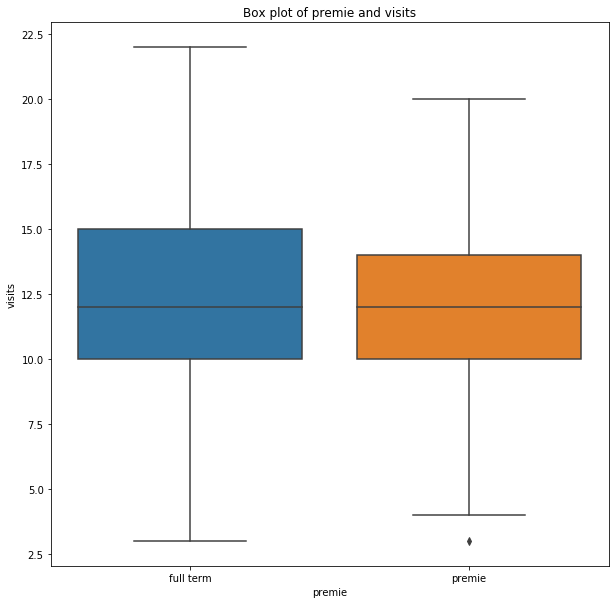

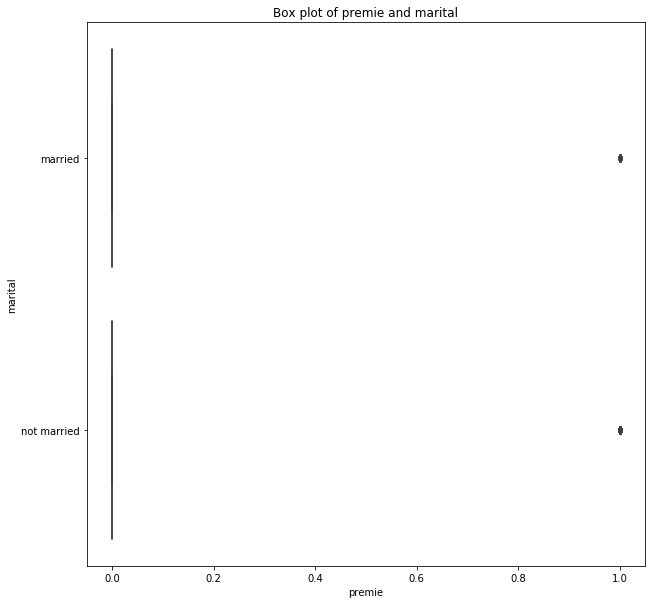

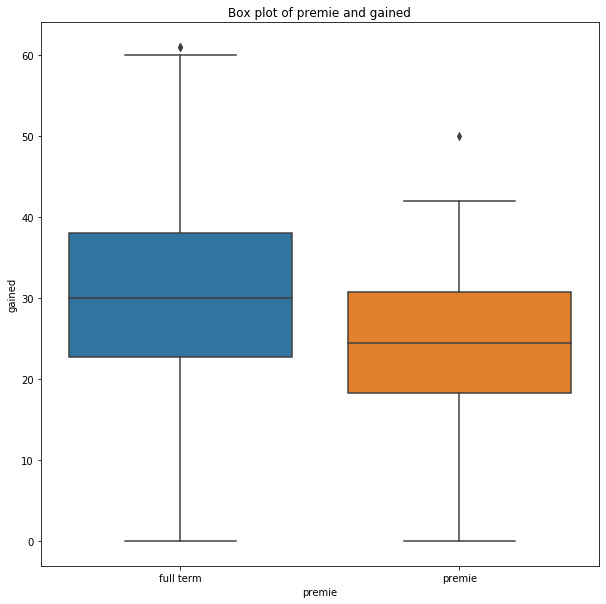

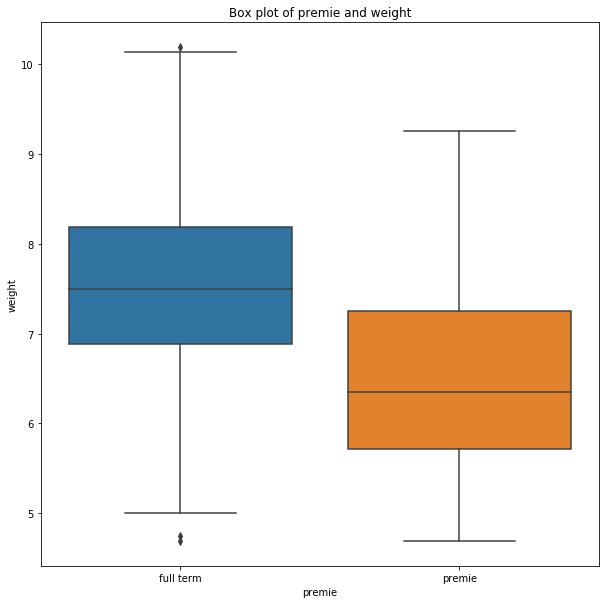

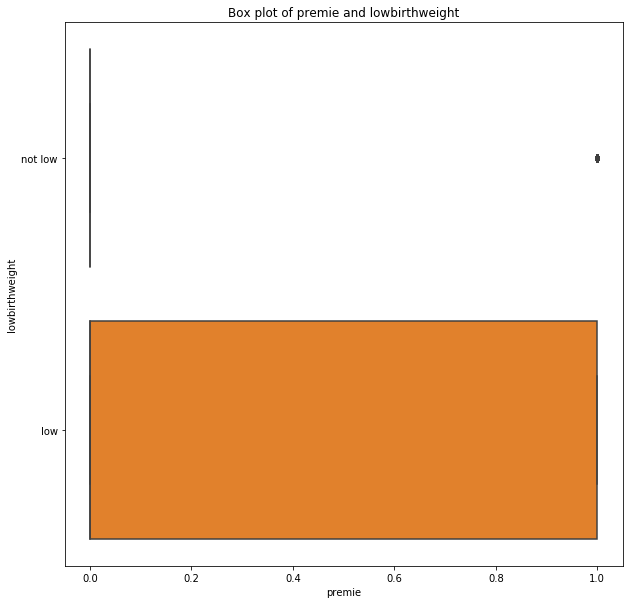

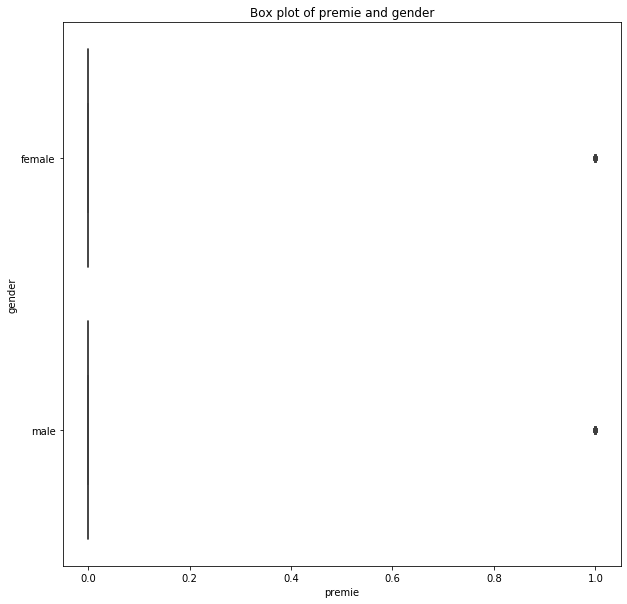

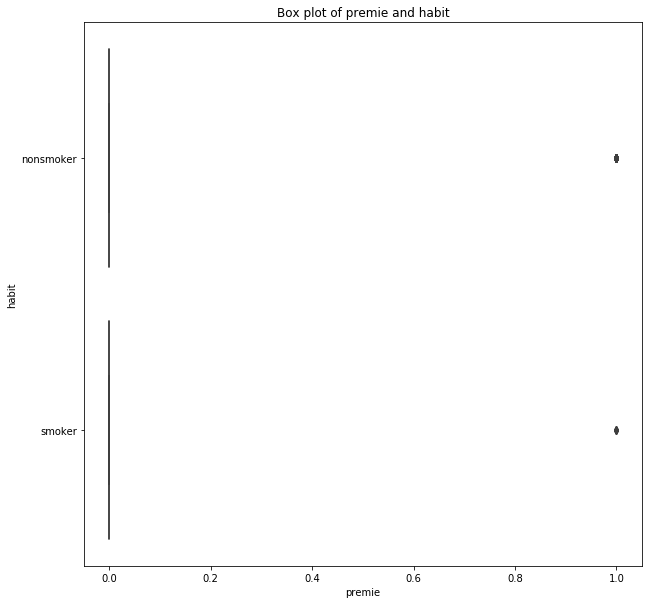

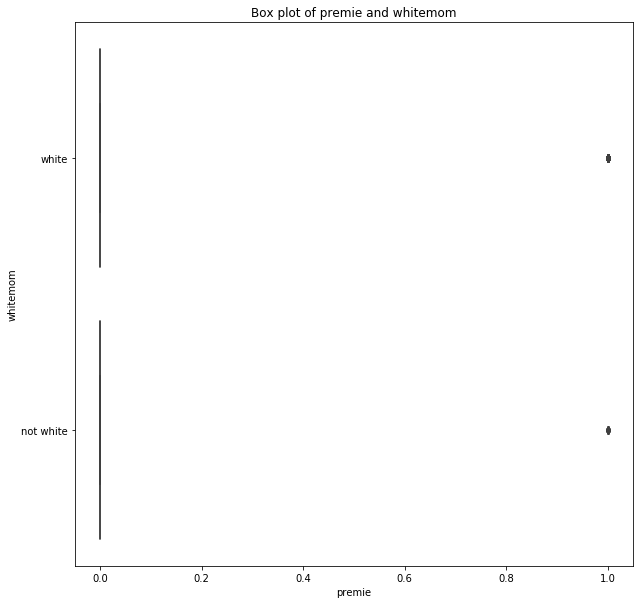

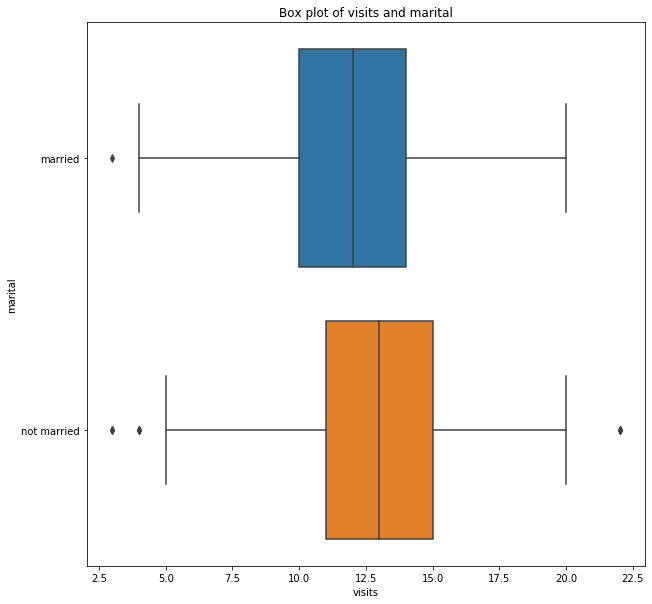

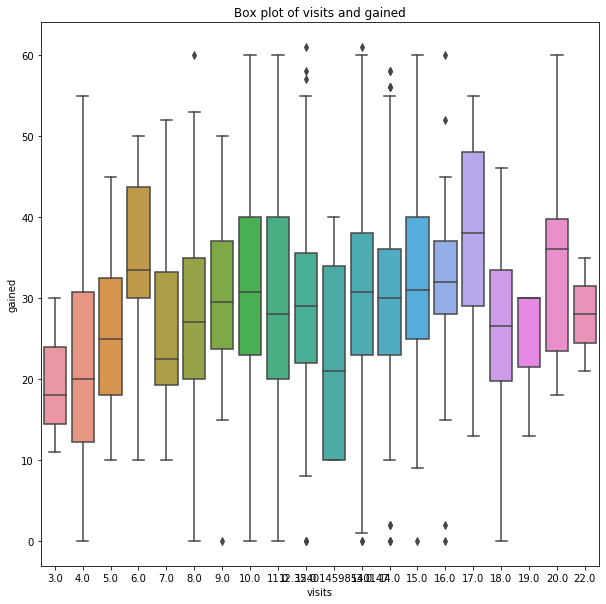

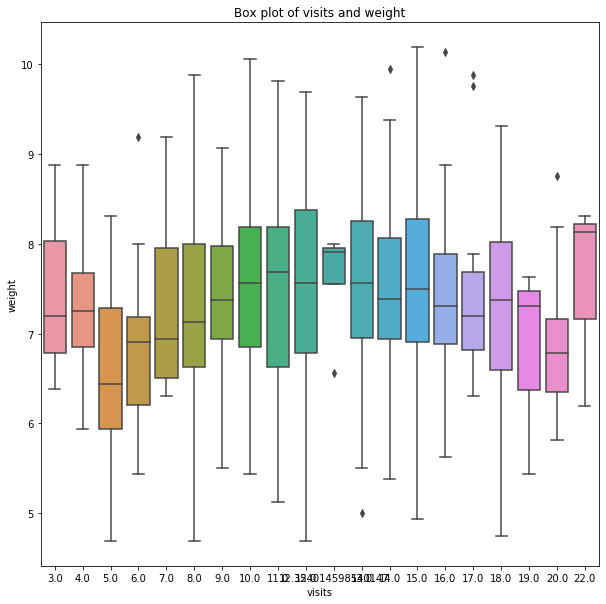

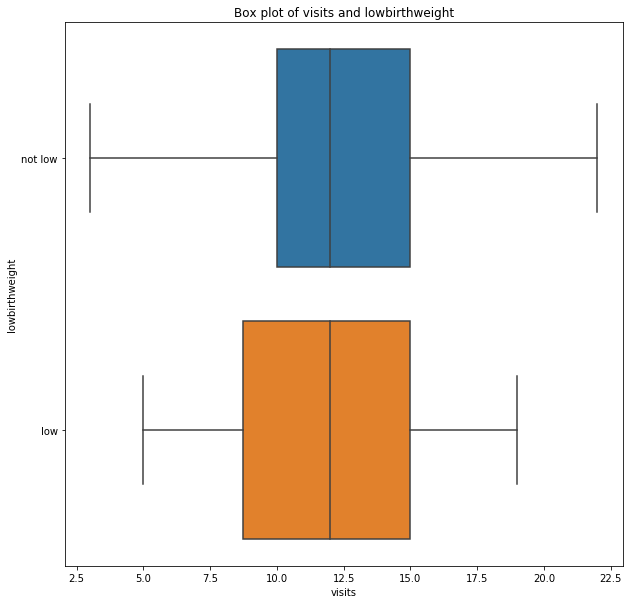

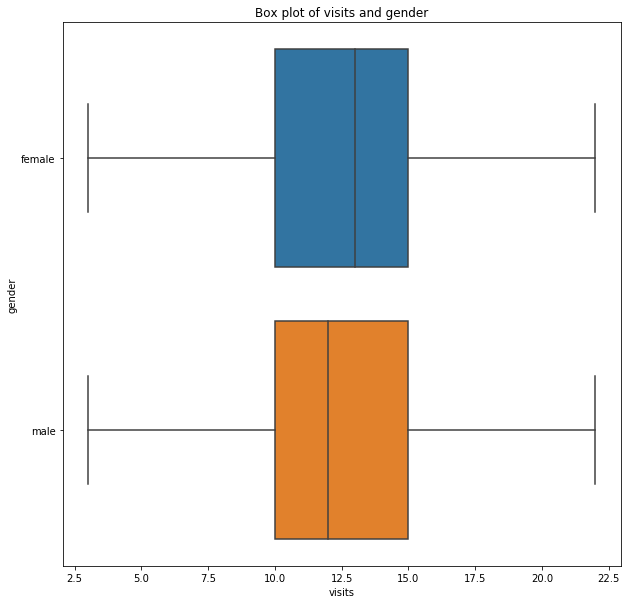

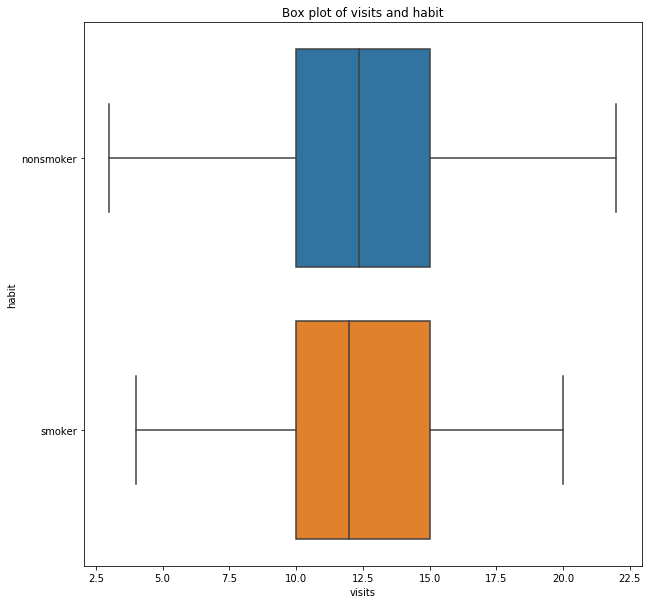

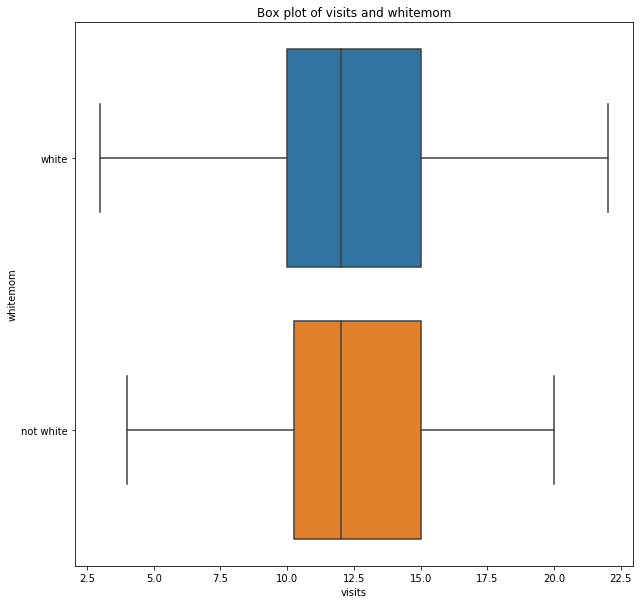

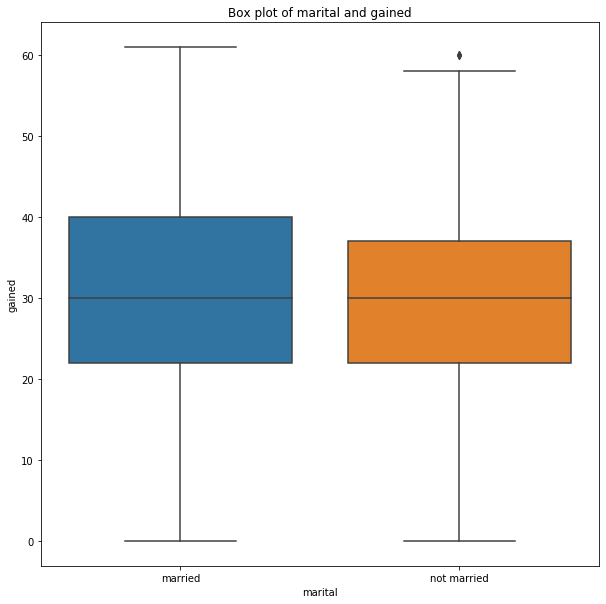

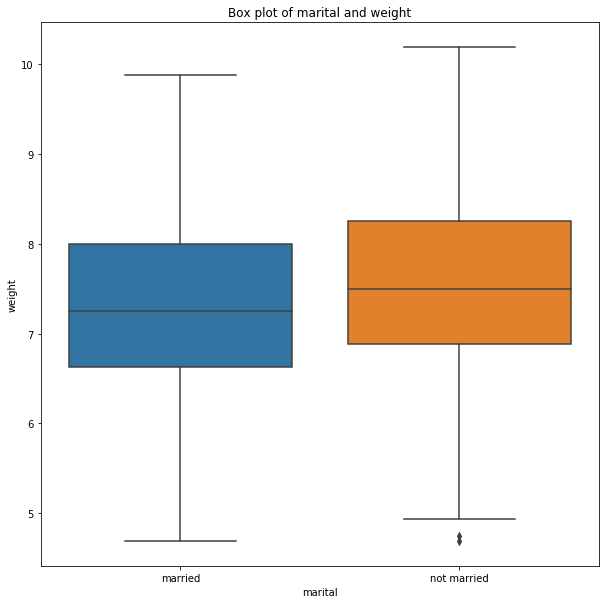

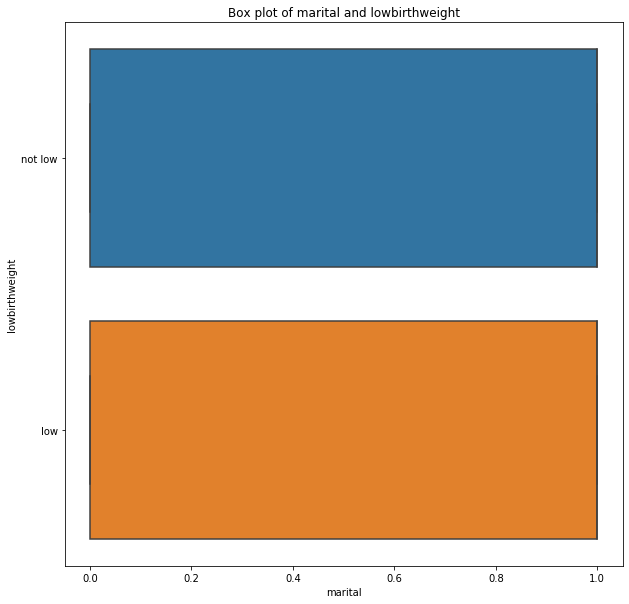

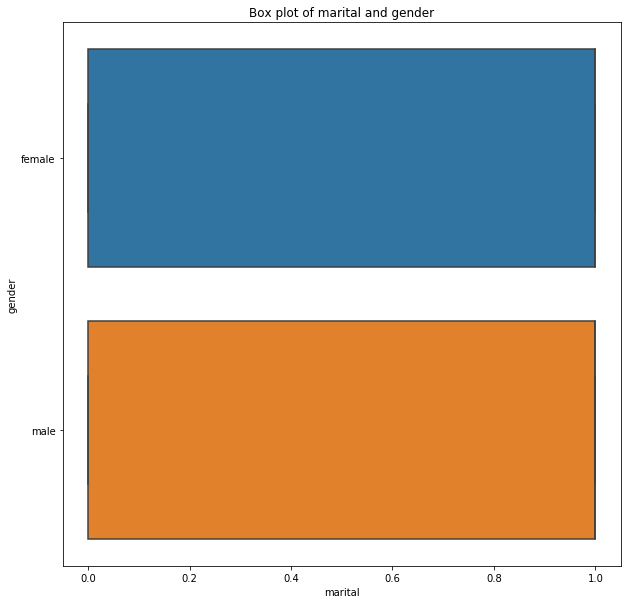

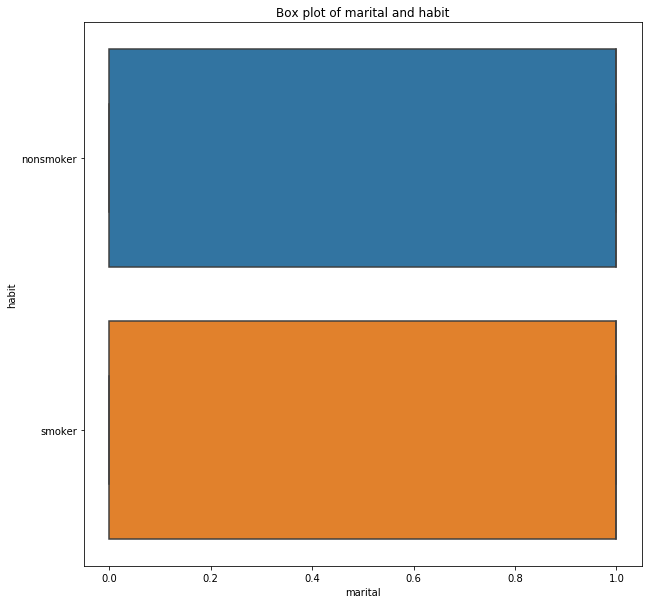

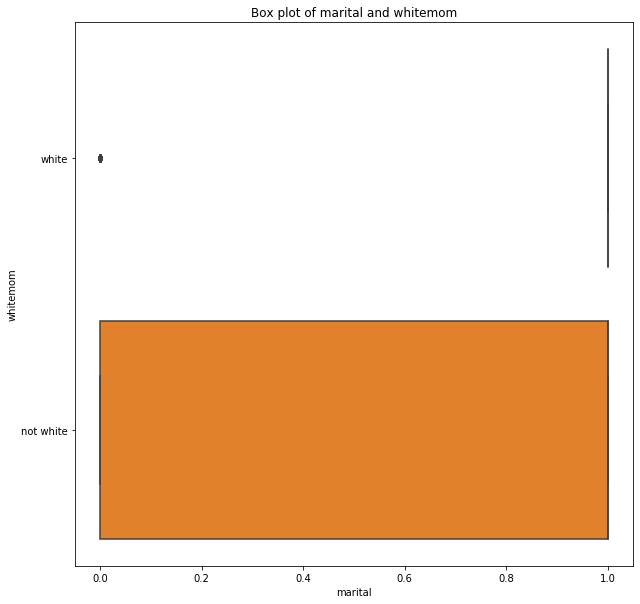

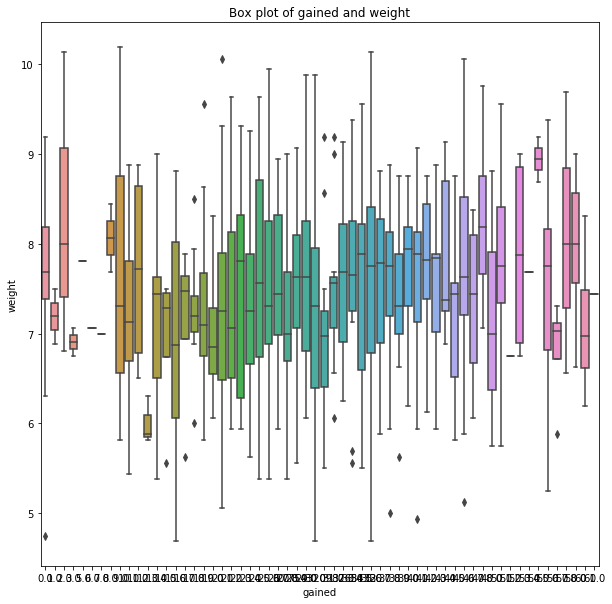

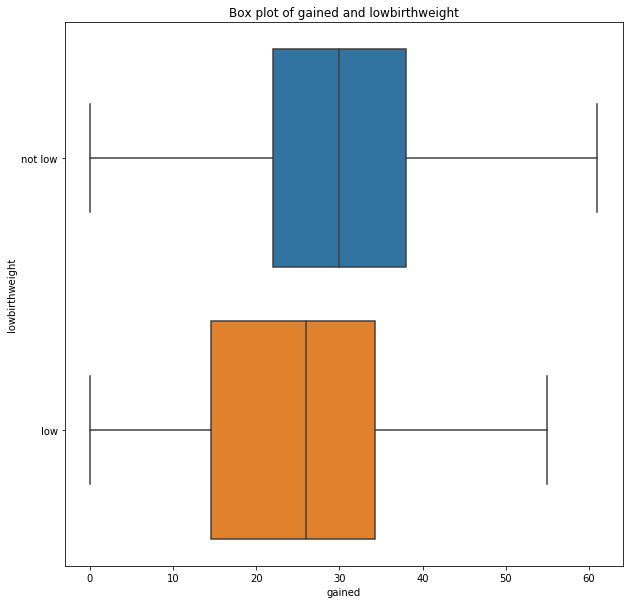

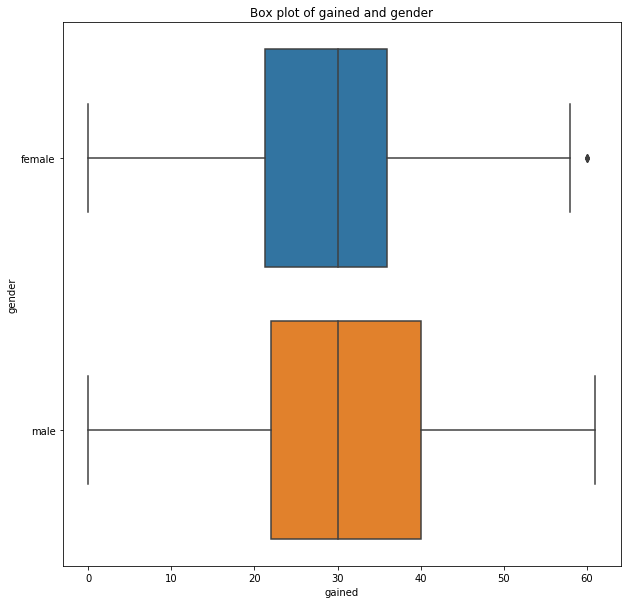

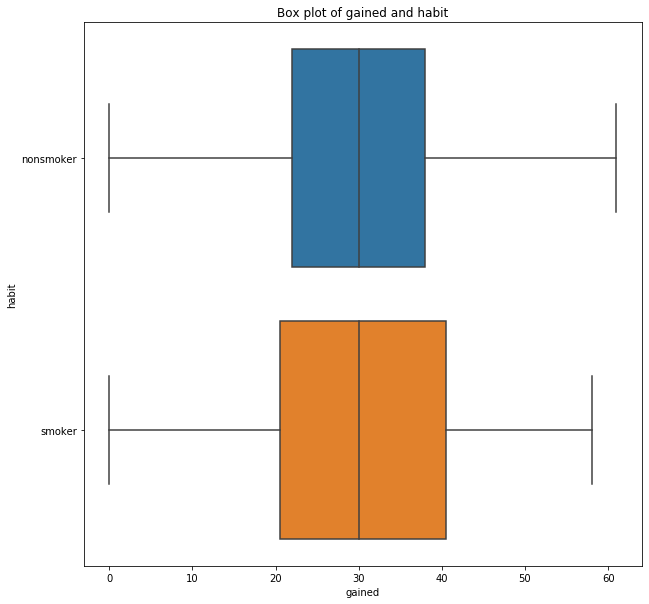

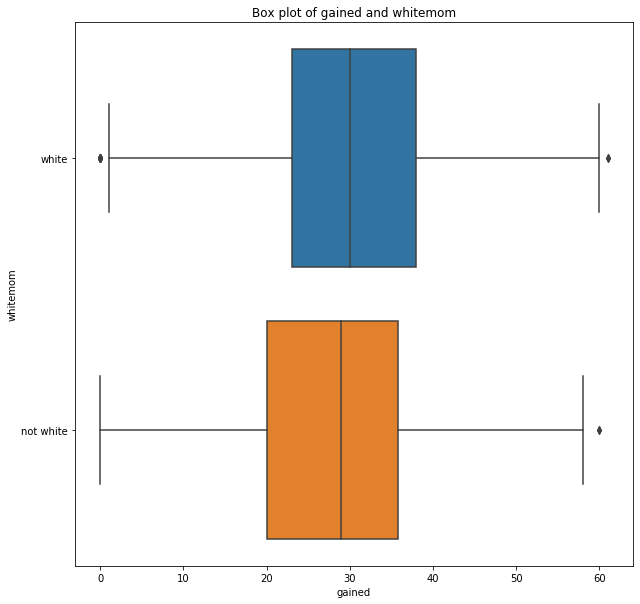

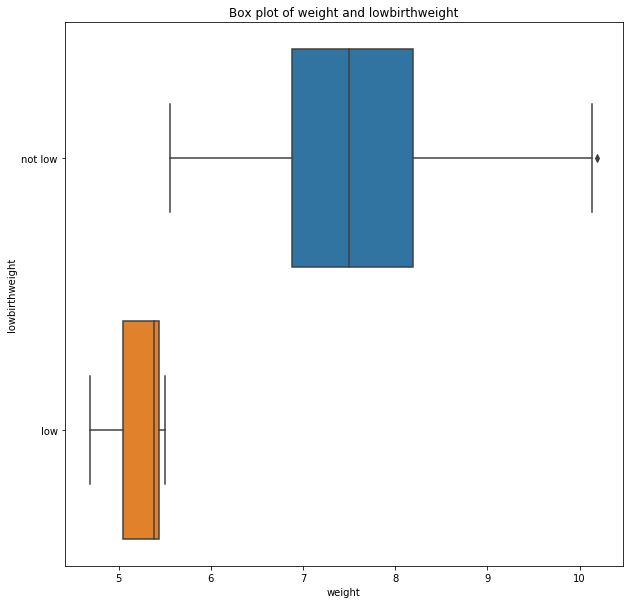

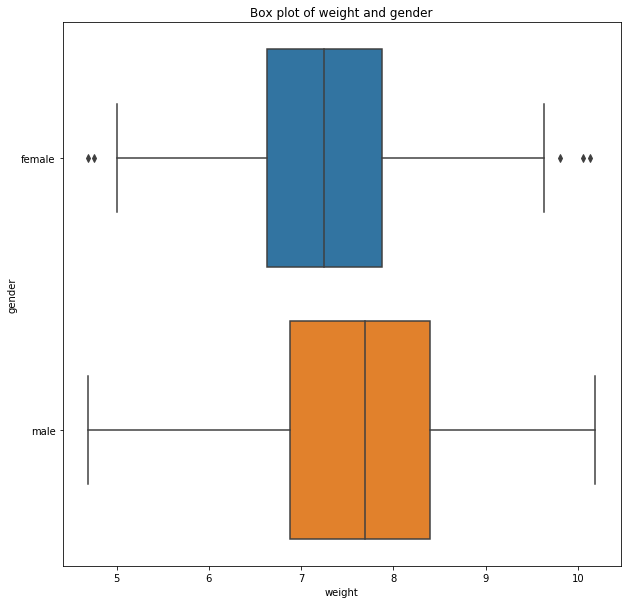

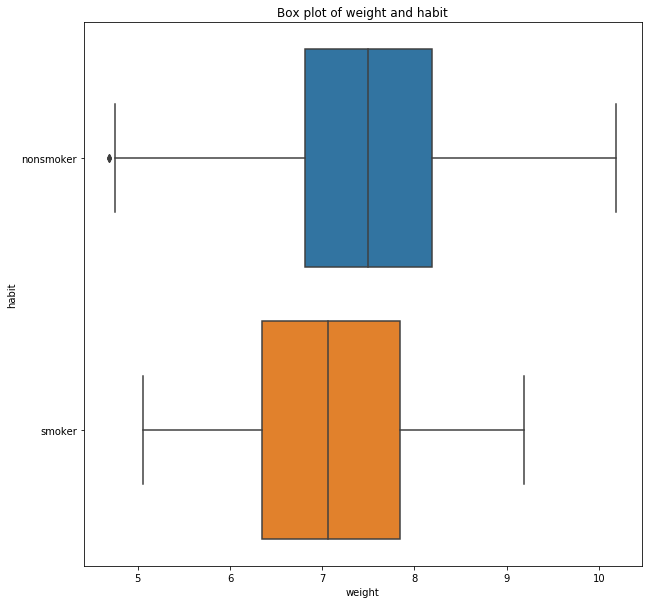

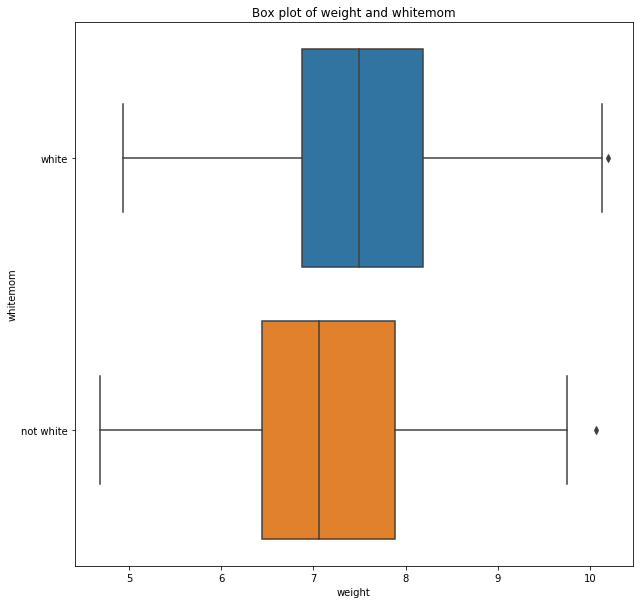

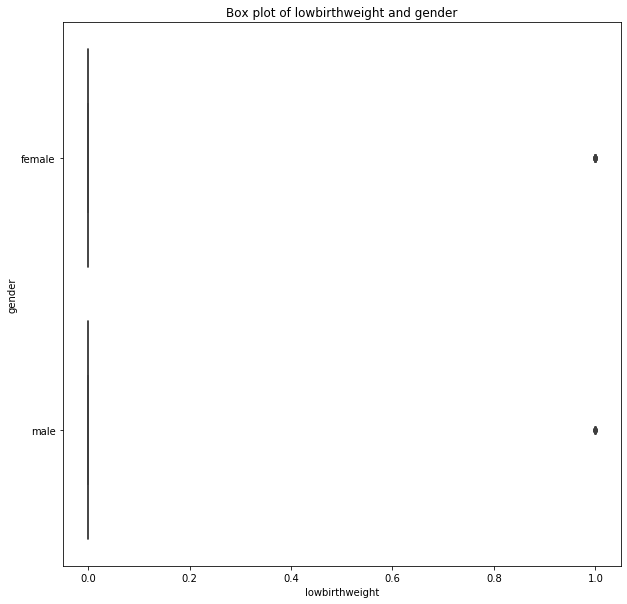

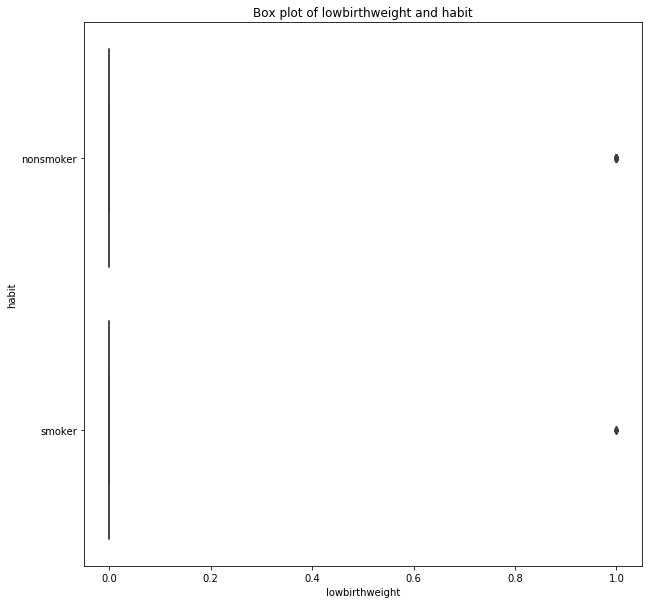

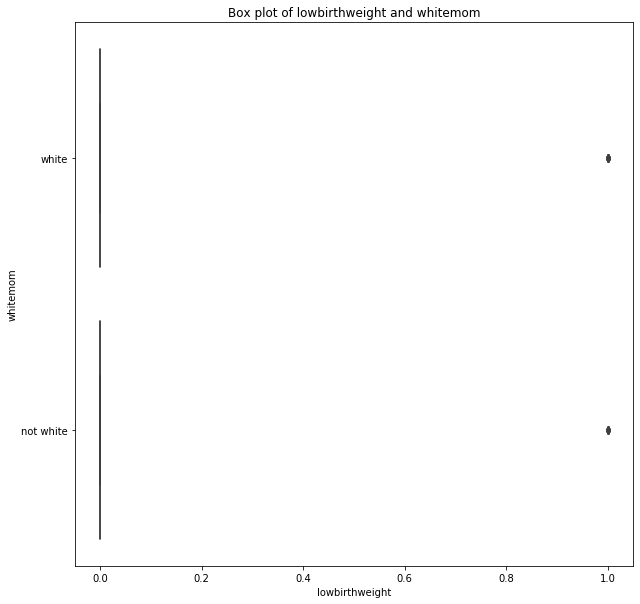

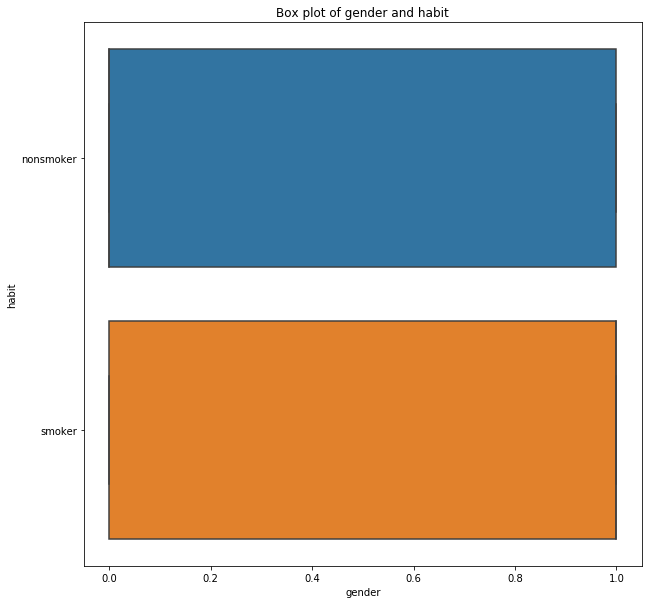

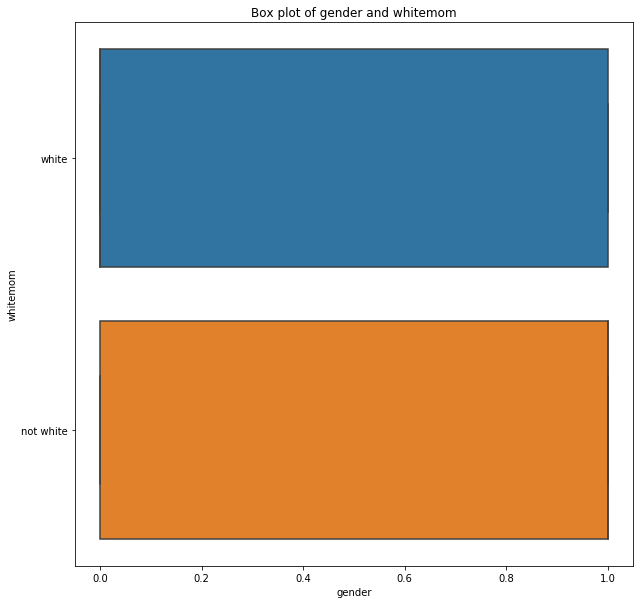

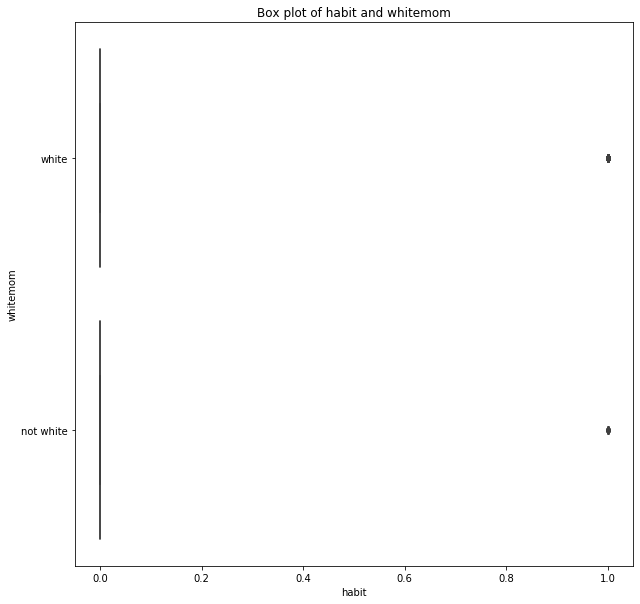

In [148]:
from itertools import combinations

numerical_col_names = df.select_dtypes(include=np.number)
cc = list(combinations(df.columns,2))

df_ = df.copy()
for pair in cc:
    plt.figure(figsize=(10,10))
    if(pair[0] not in numerical_col_names and pair[1] not in numerical_col_names): # if both not numerical:
        df_[pair[0]] = pd.factorize(df[pair[0]])[0]
        plot = sns.boxplot(x=pair[0], y=pair[1], data=df_) # make the plot 5 units high & height should be three times width
    else:
        plot = sns.boxplot(x=pair[0], y=pair[1], data=df)
    plt.title("Box plot of " + pair[0] + " and " + pair[1])
    plt.show()

### Scatter Plots

#### Categorical Scatter plots for every column combination

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


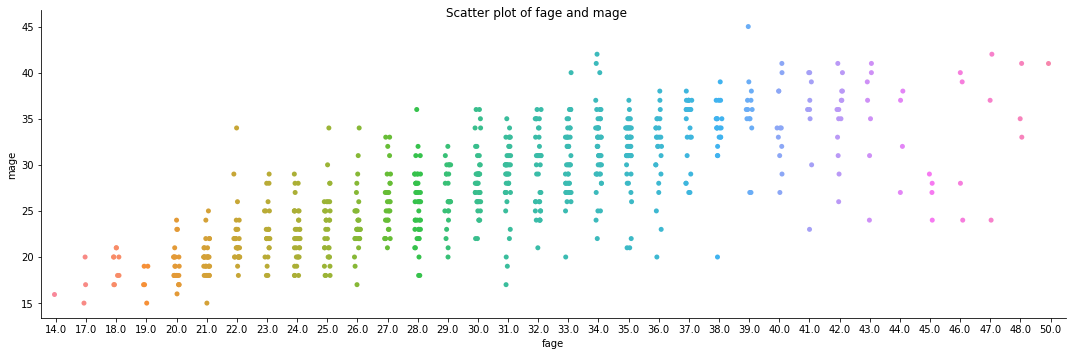

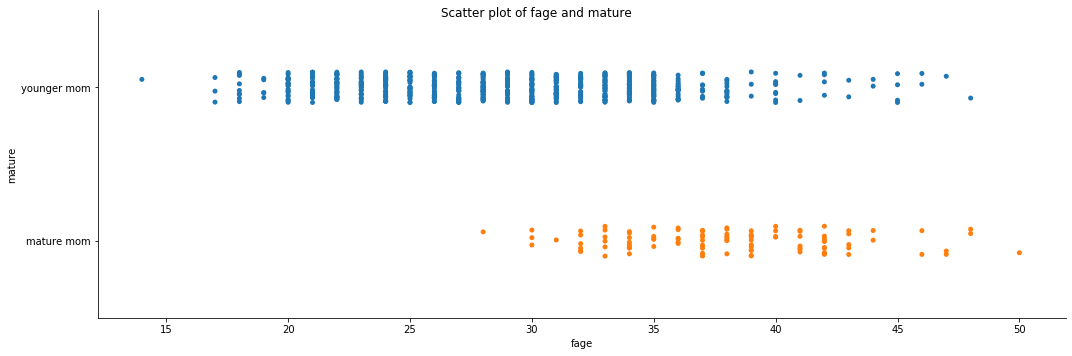

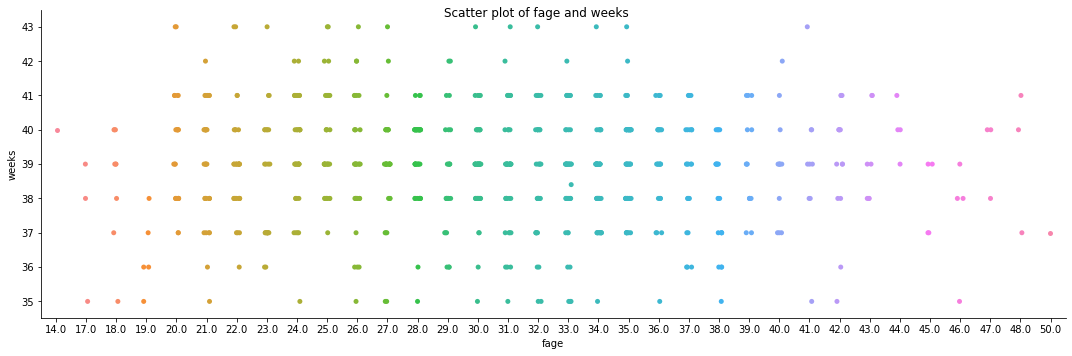

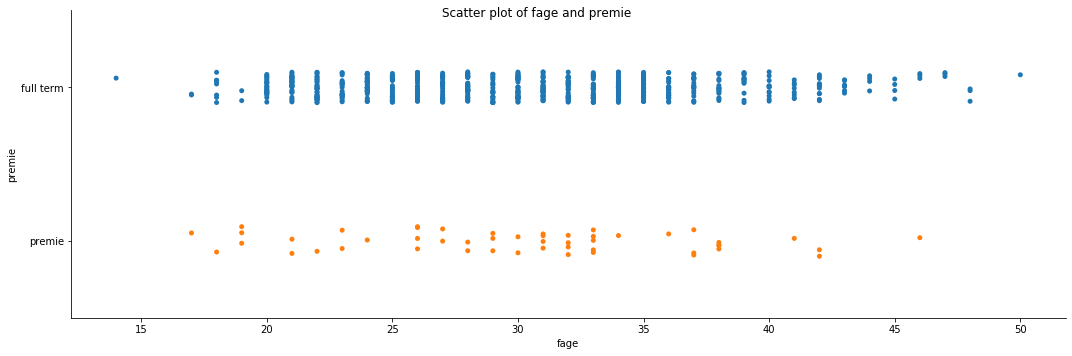

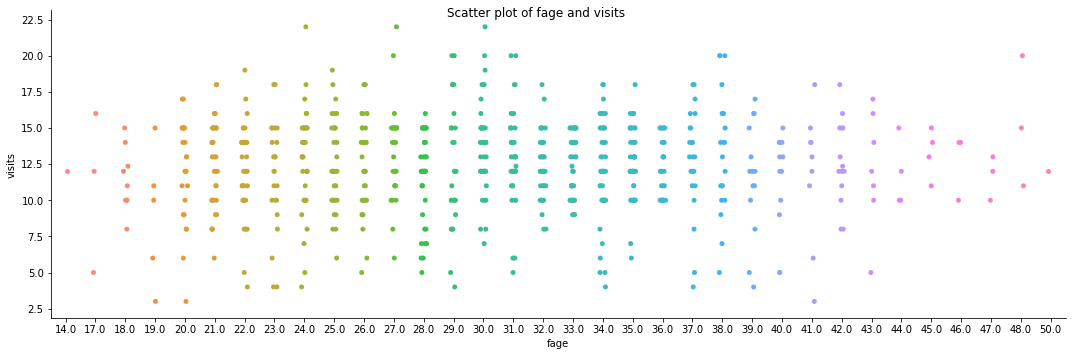

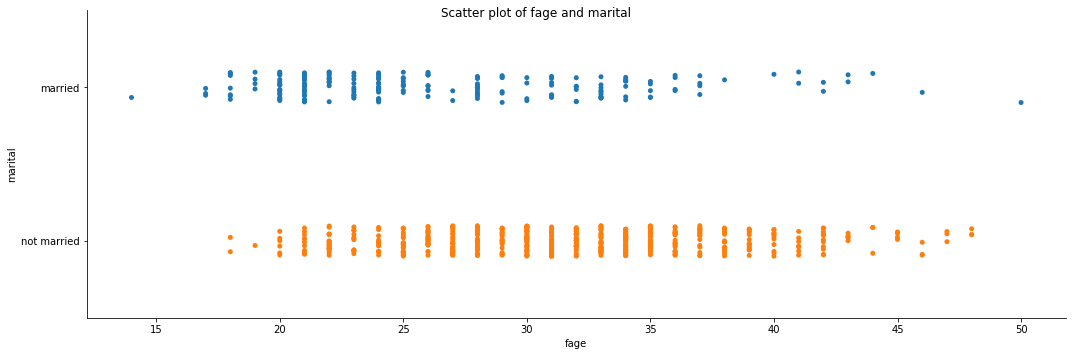

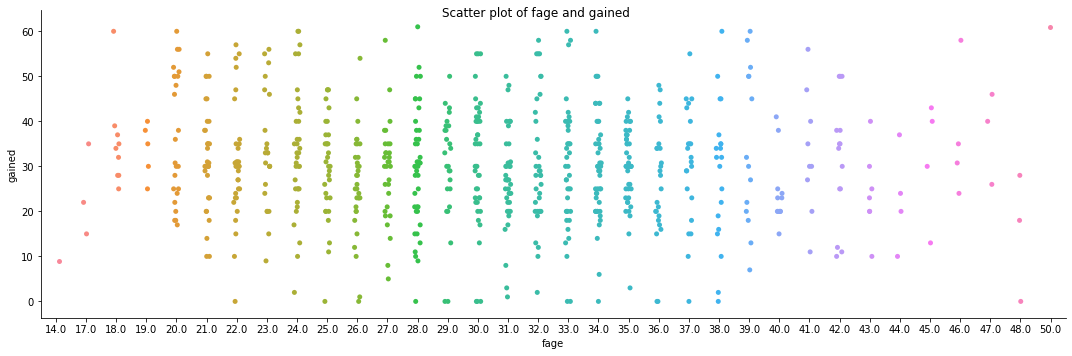

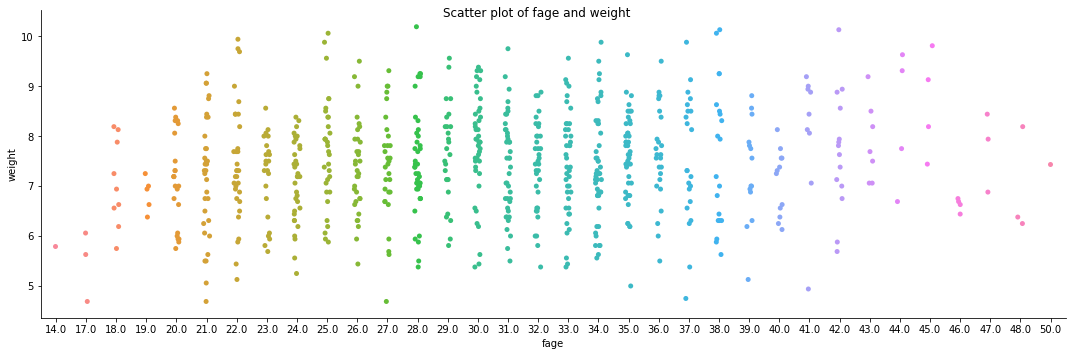

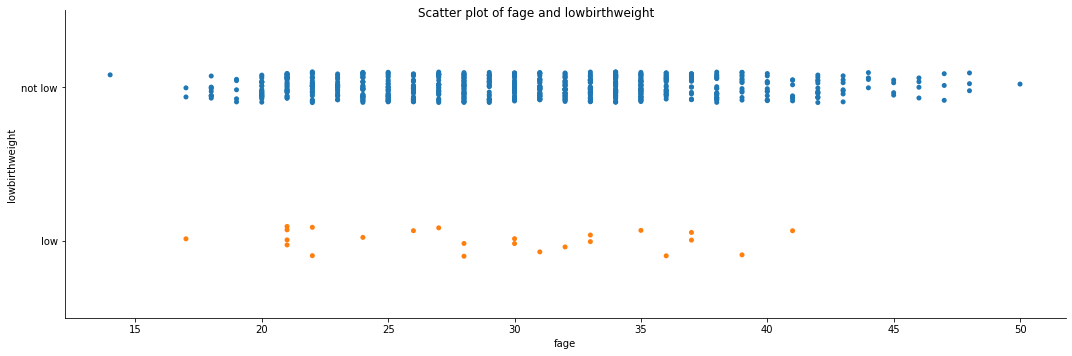

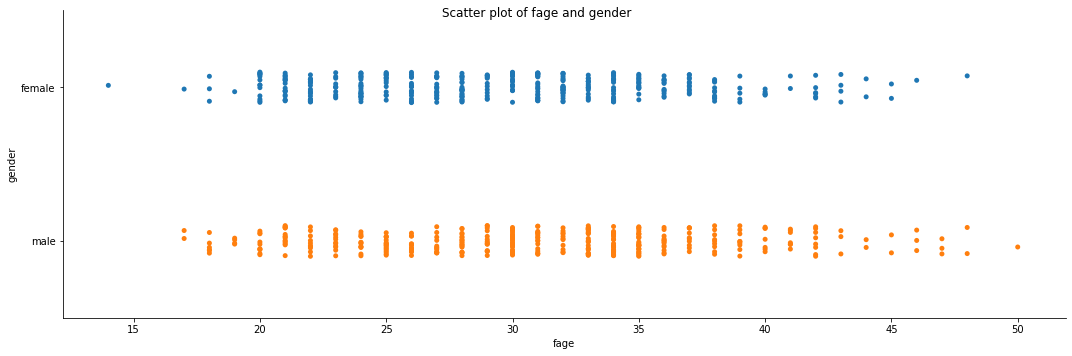

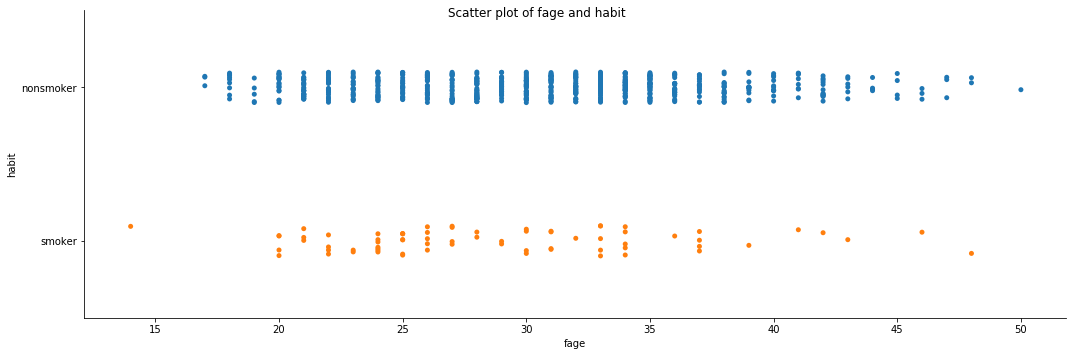

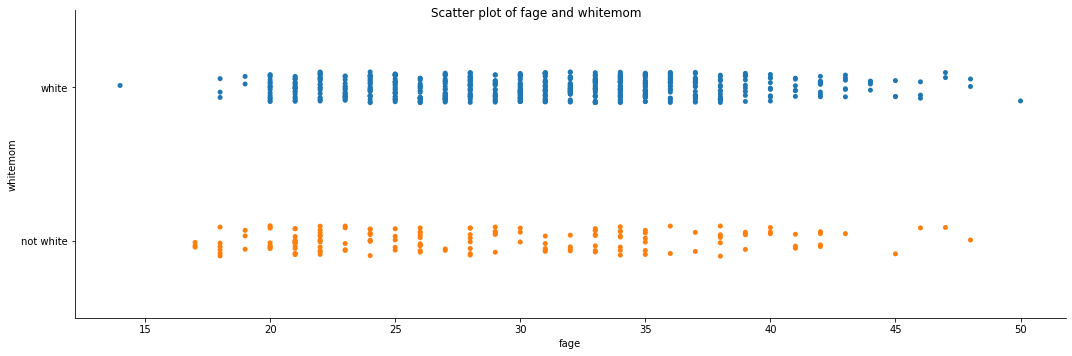

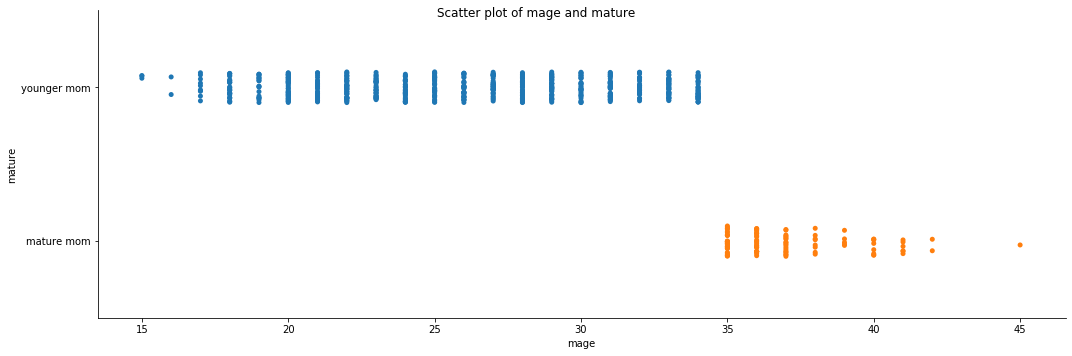

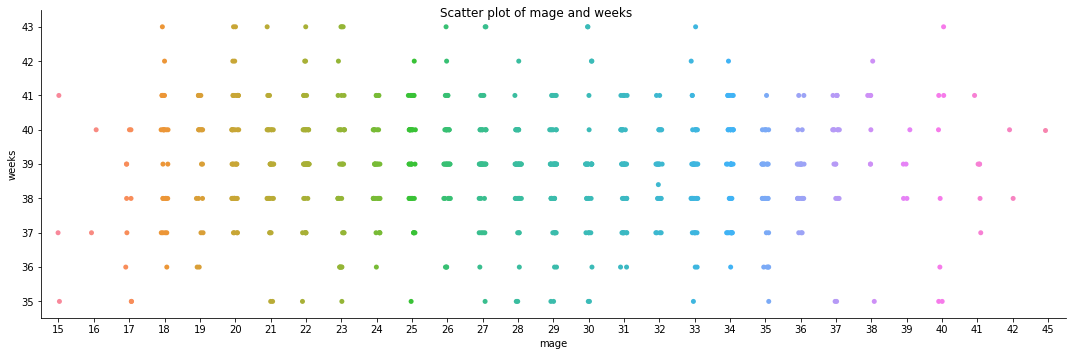

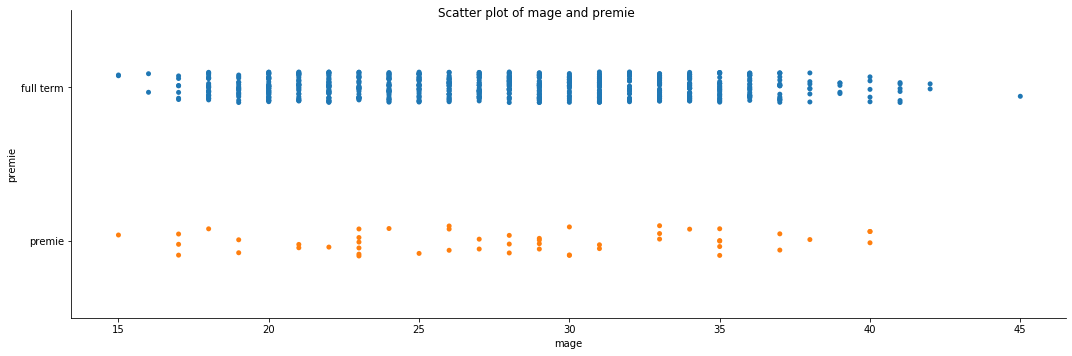

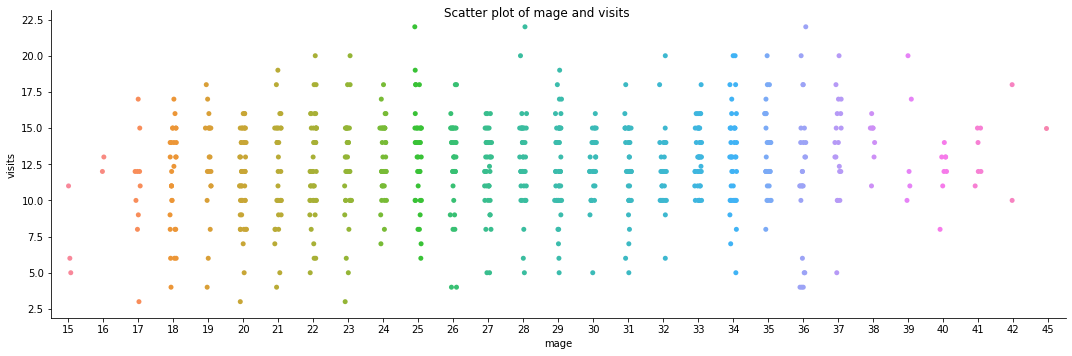

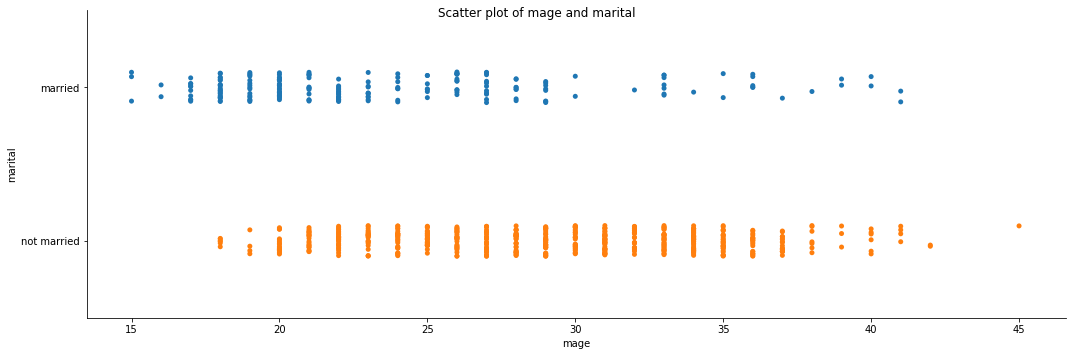

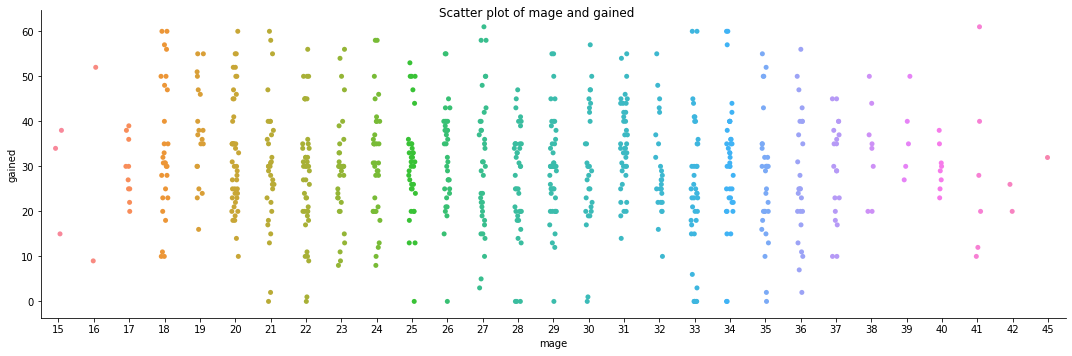

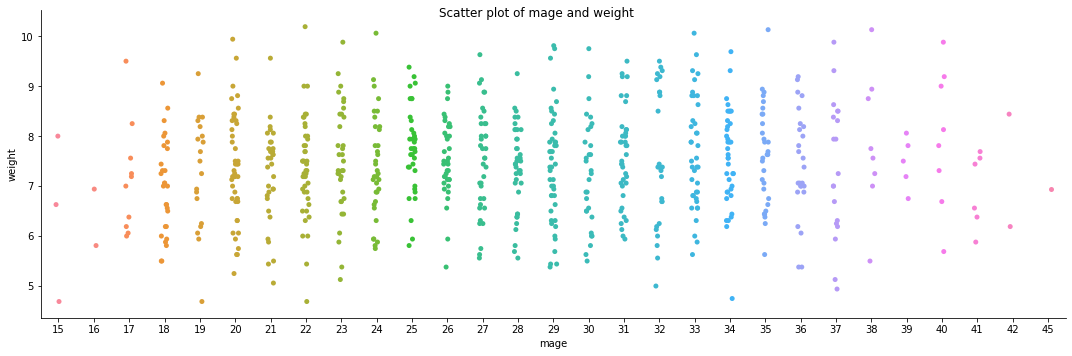

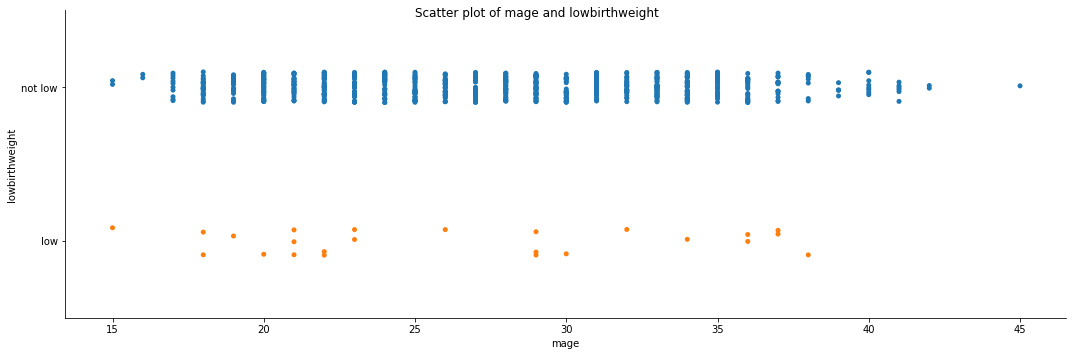

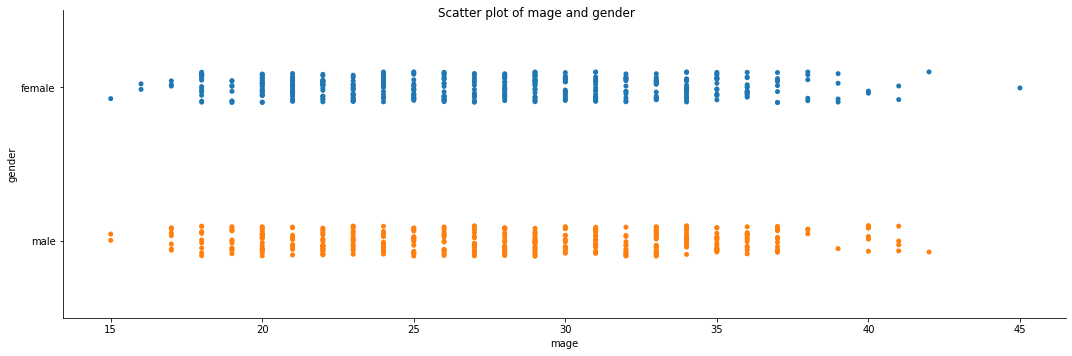

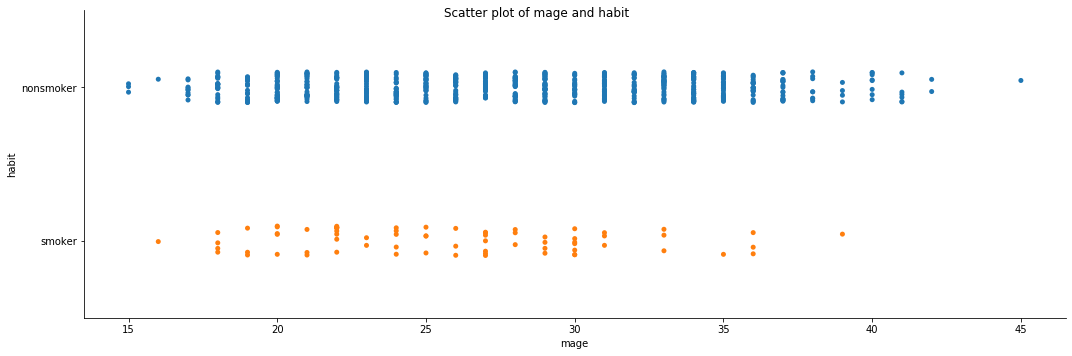

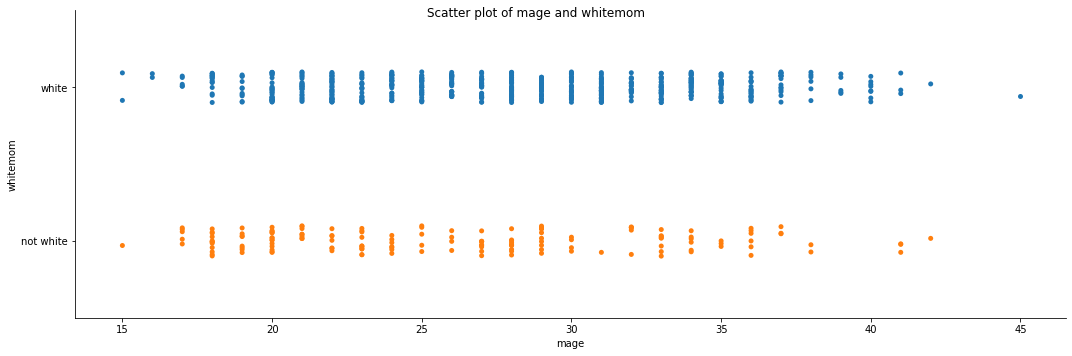

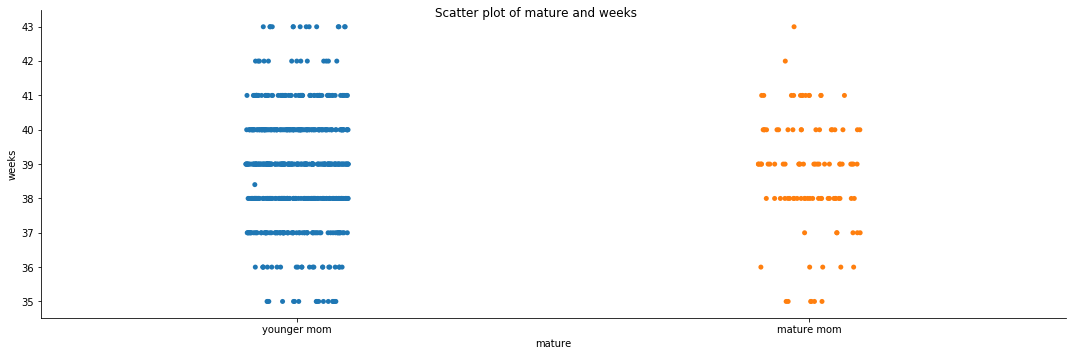

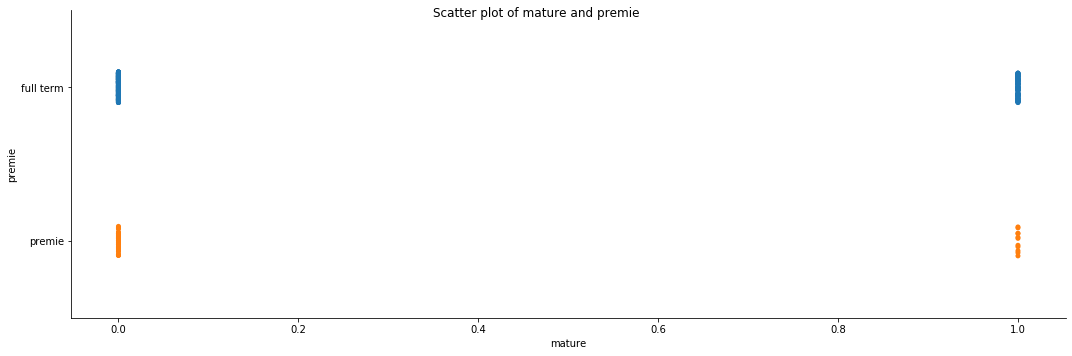

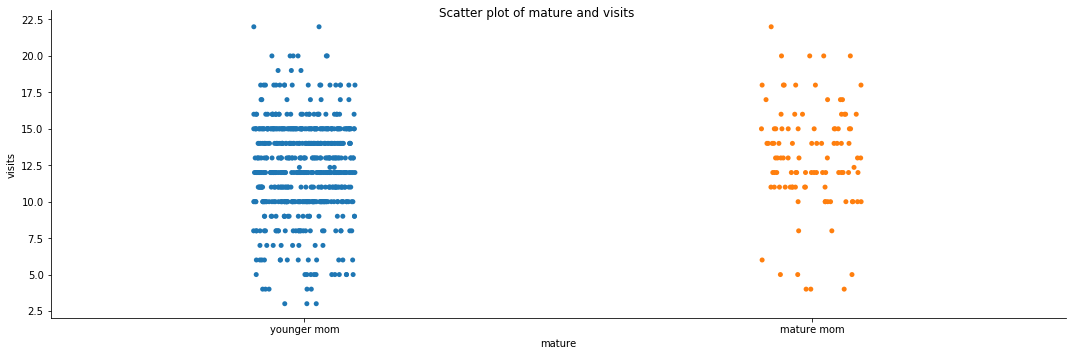

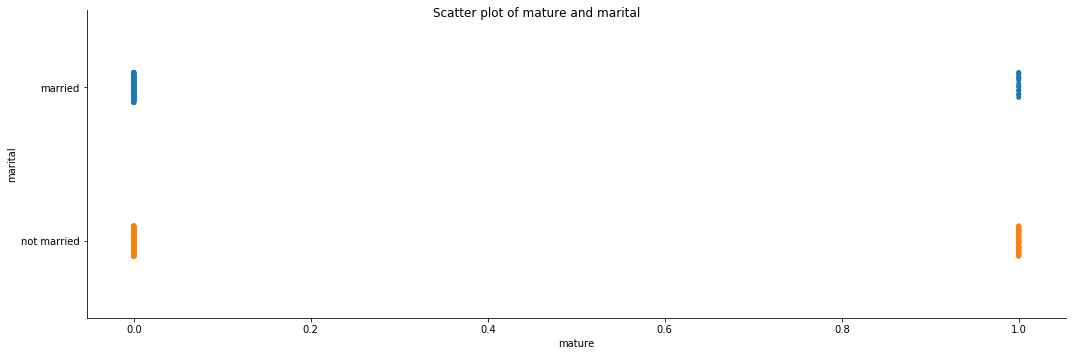

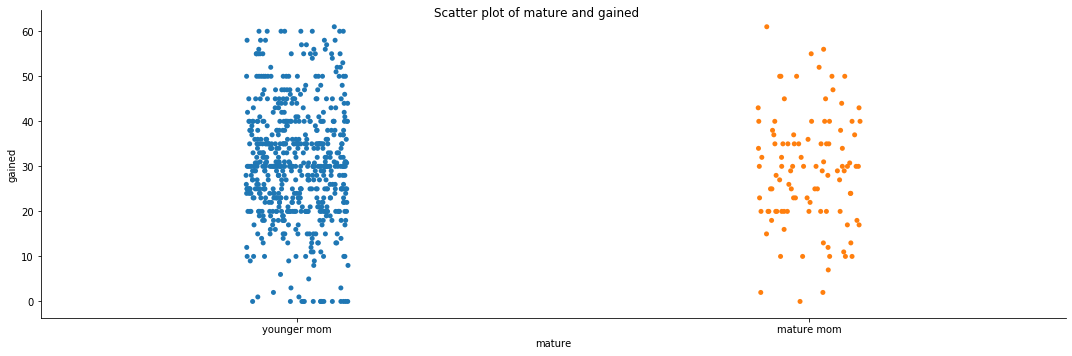

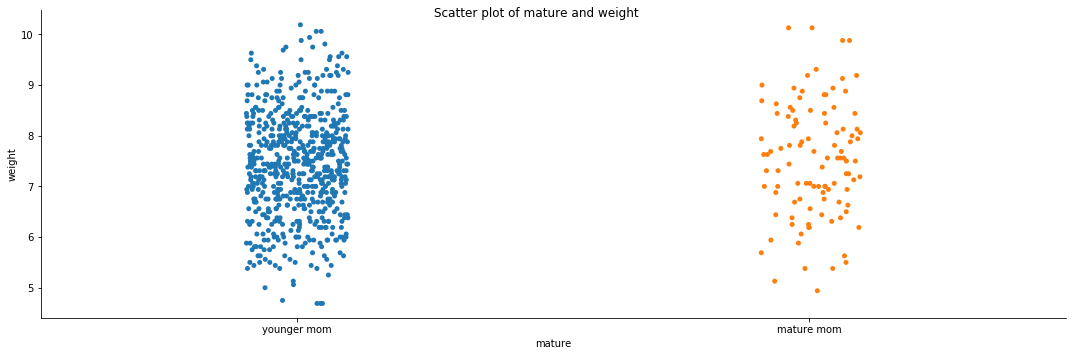

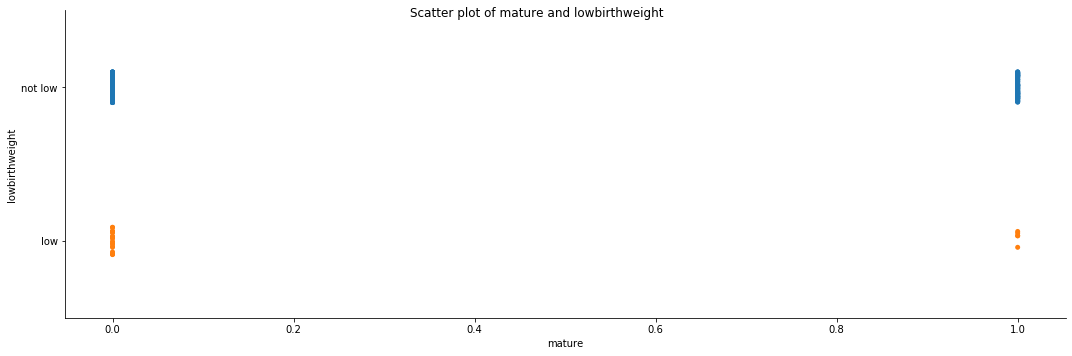

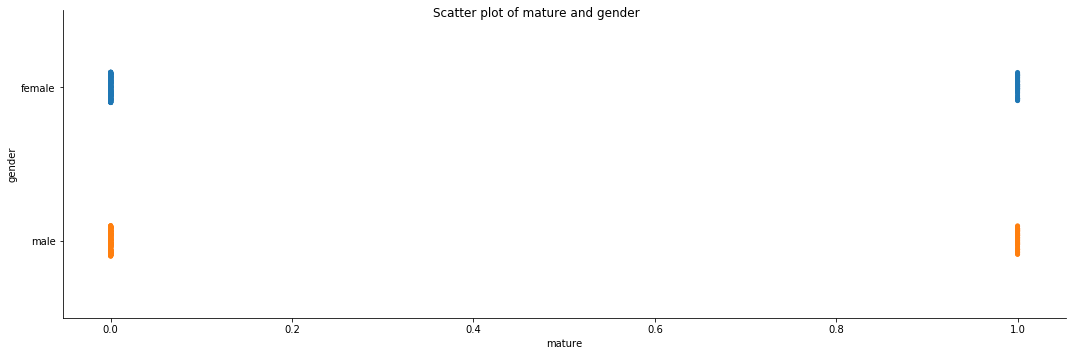

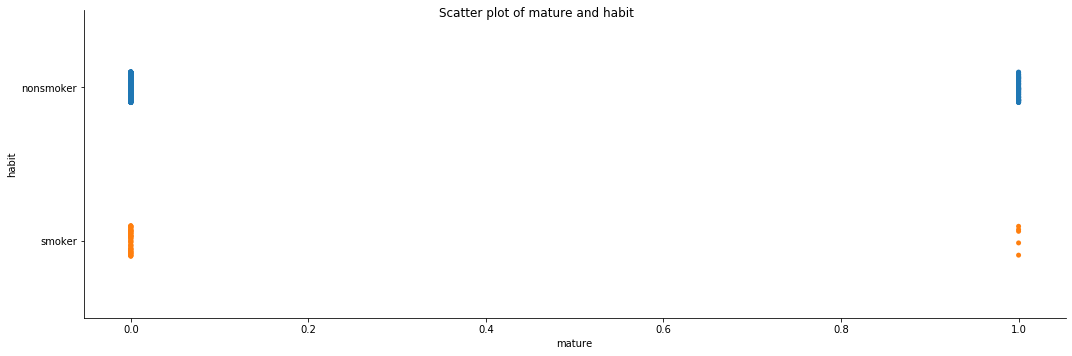

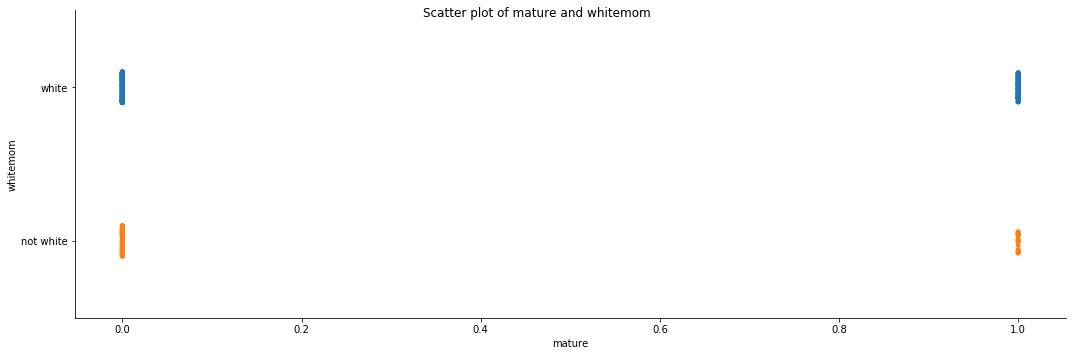

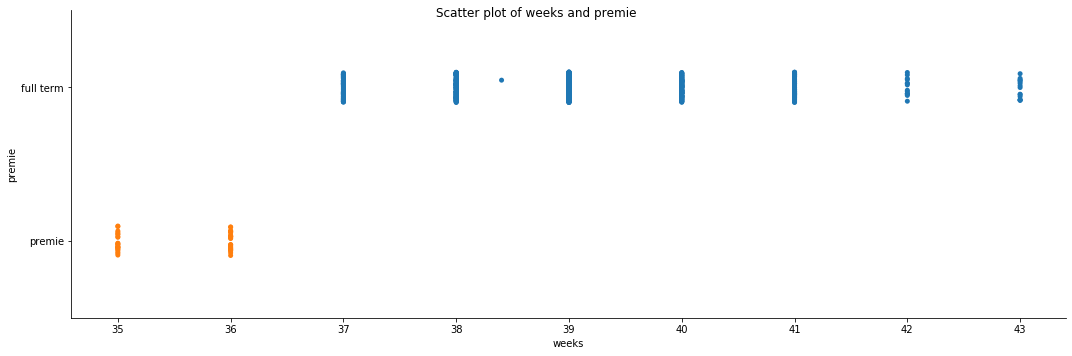

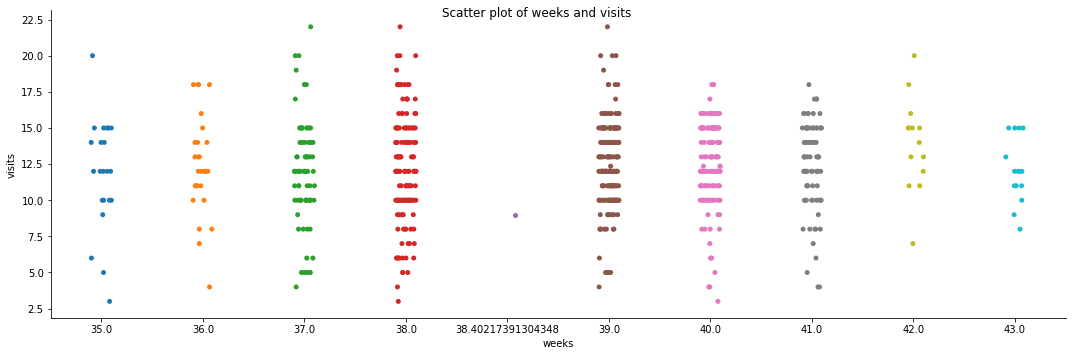

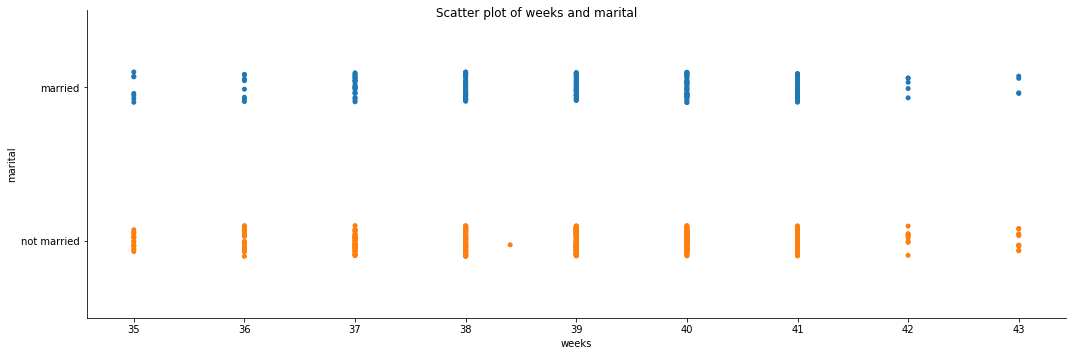

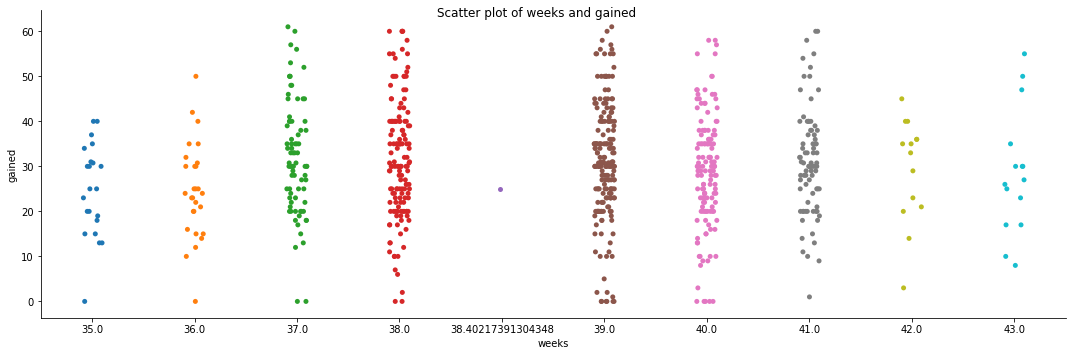

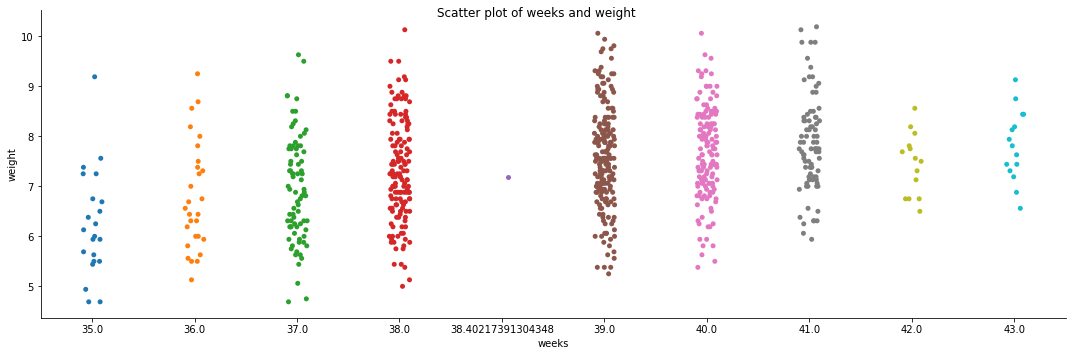

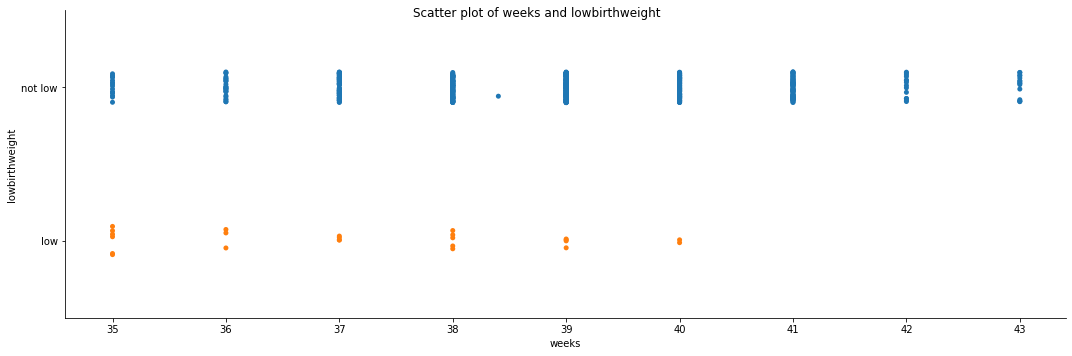

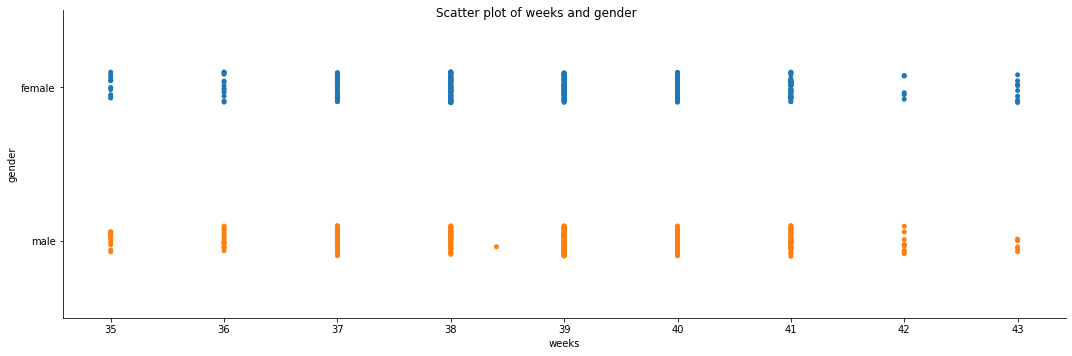

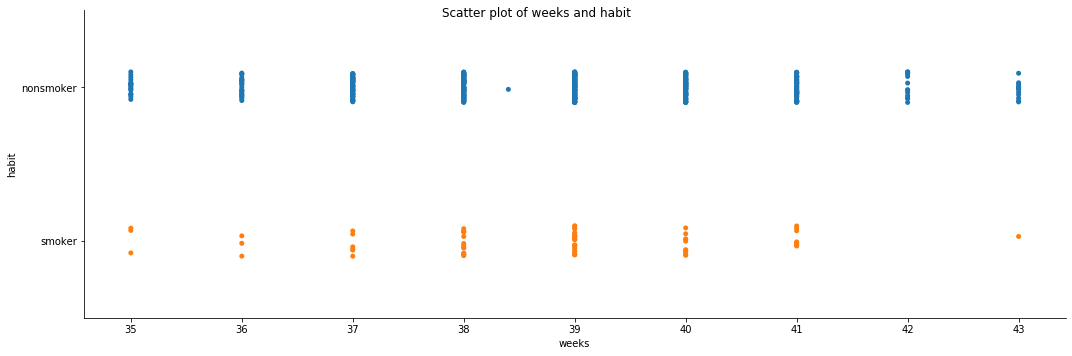

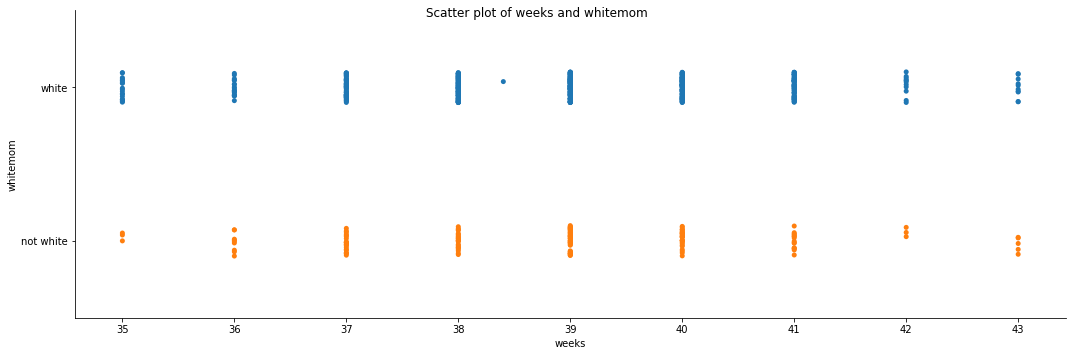

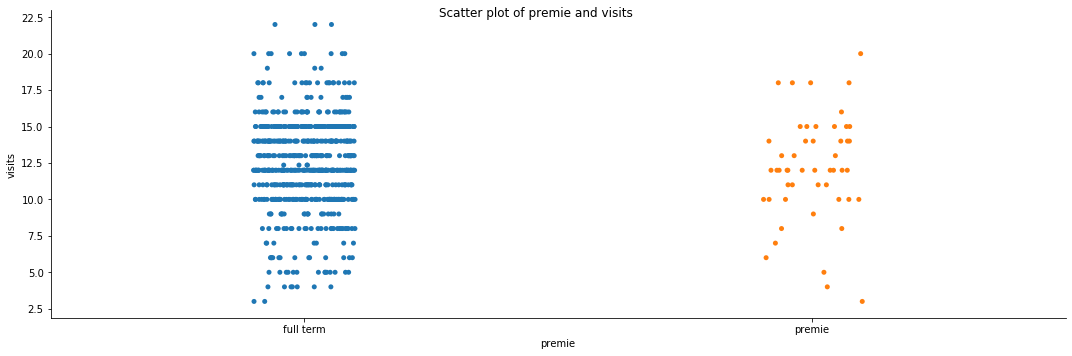

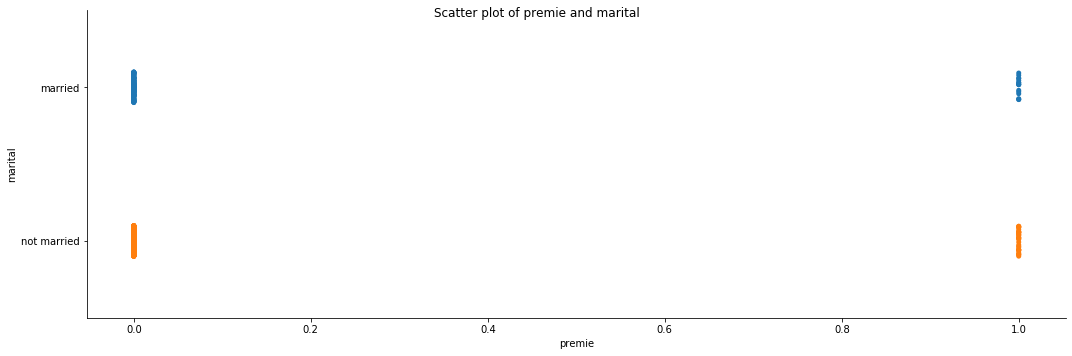

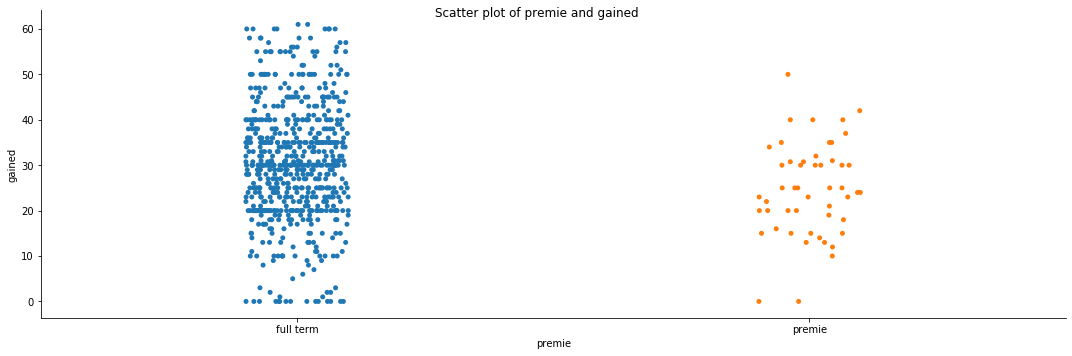

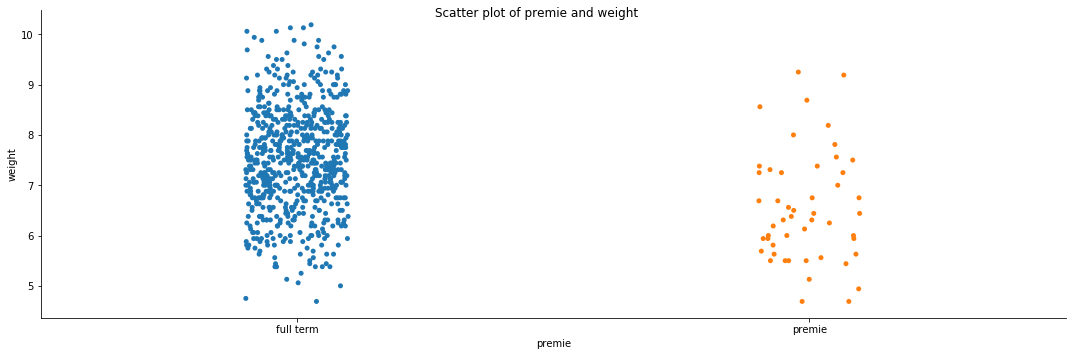

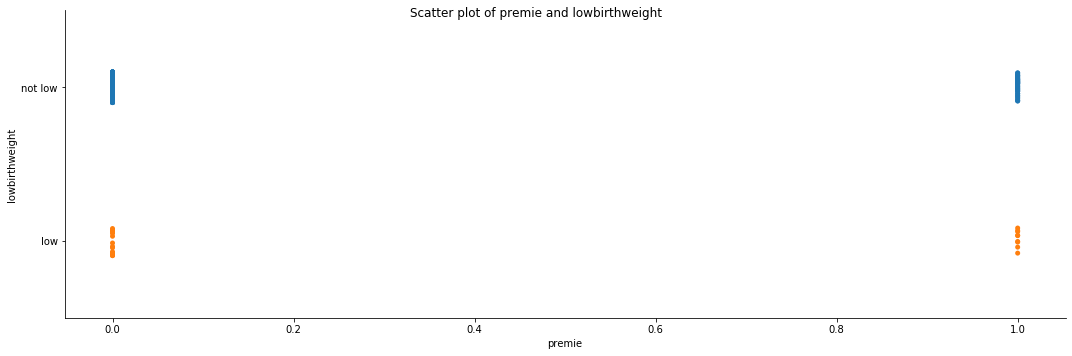

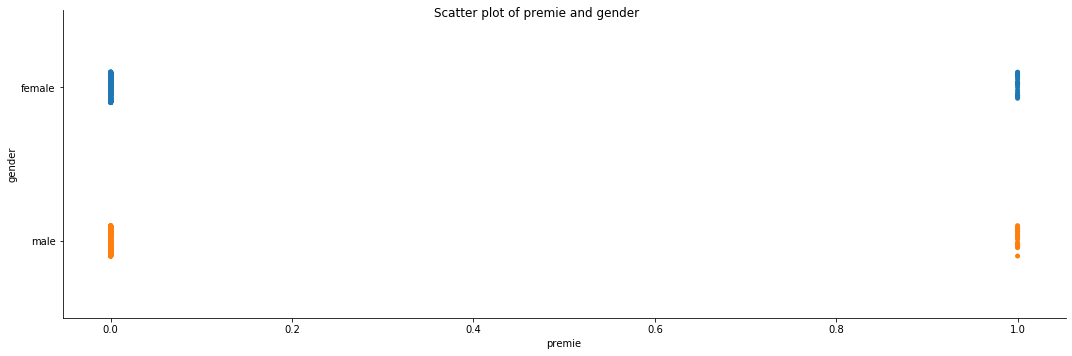

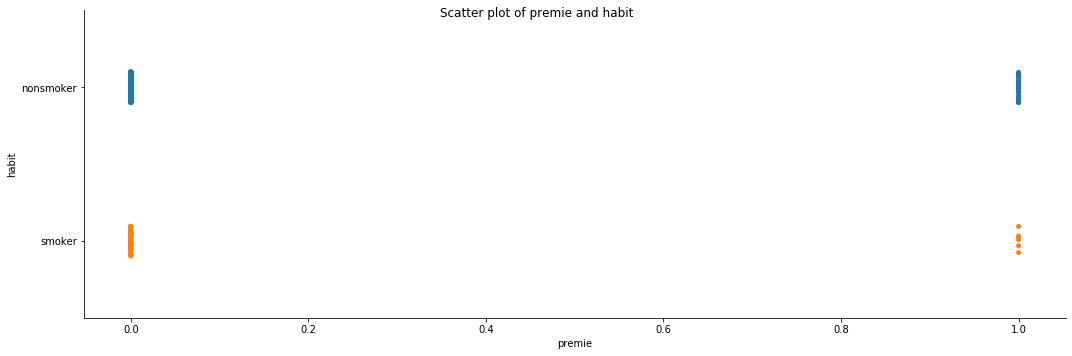

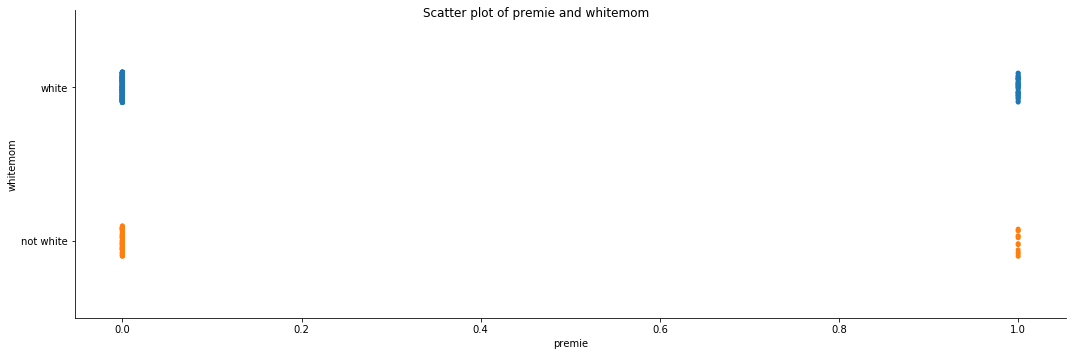

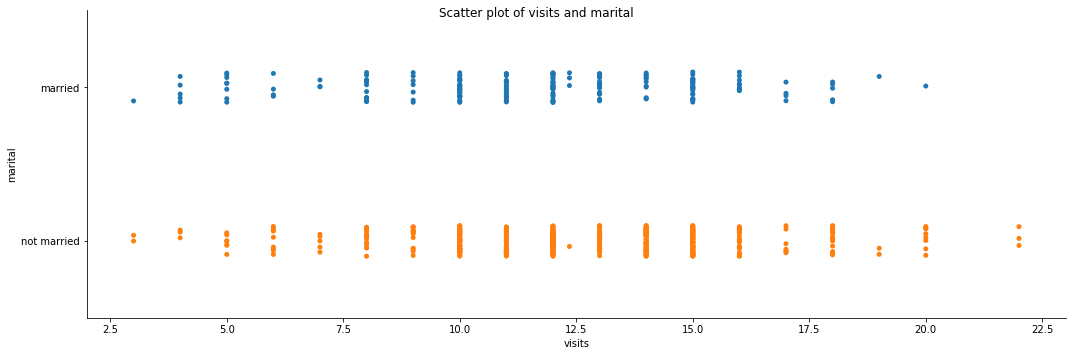

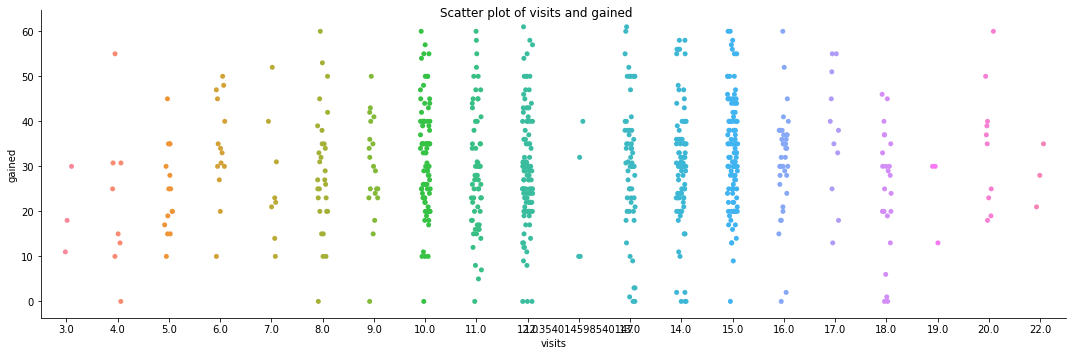

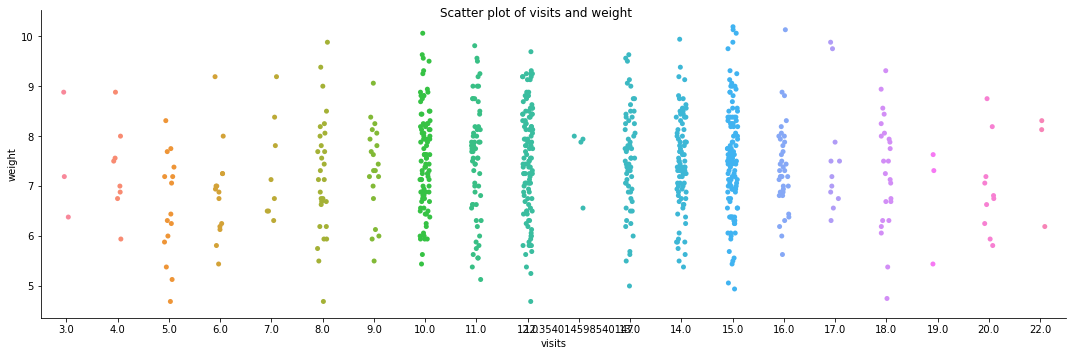

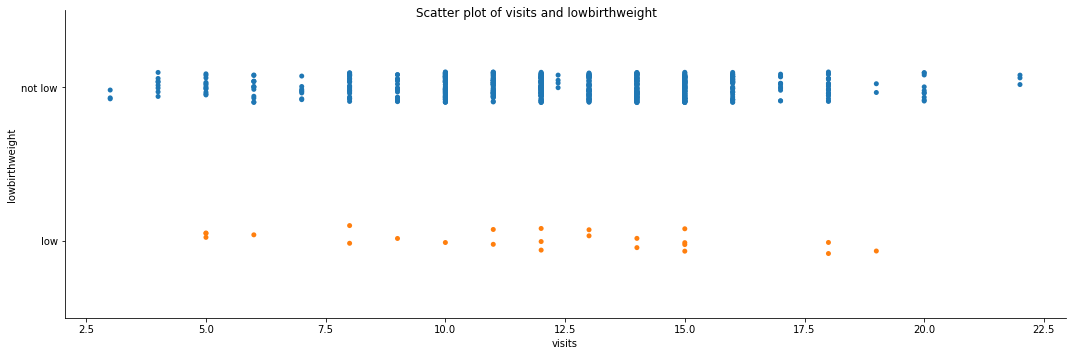

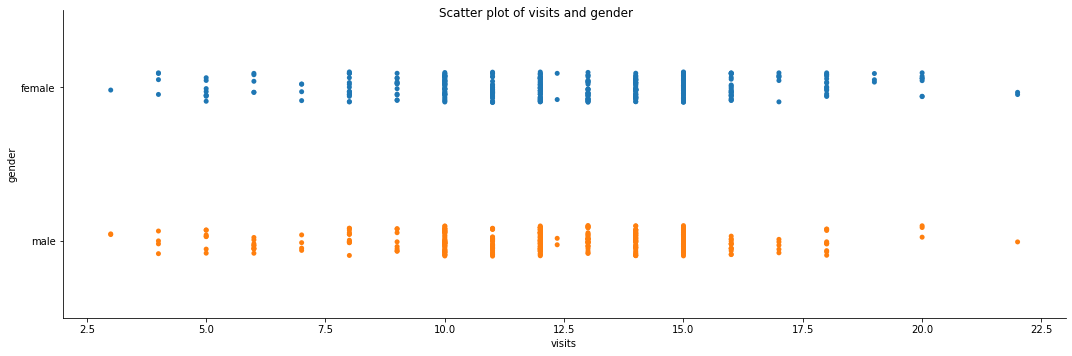

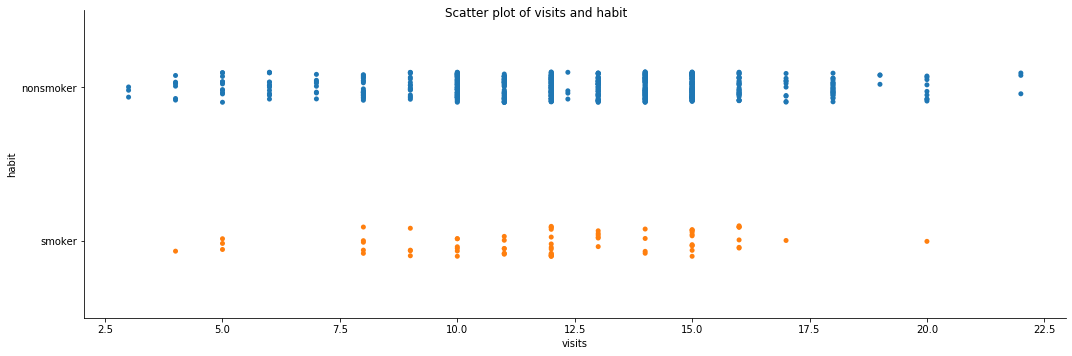

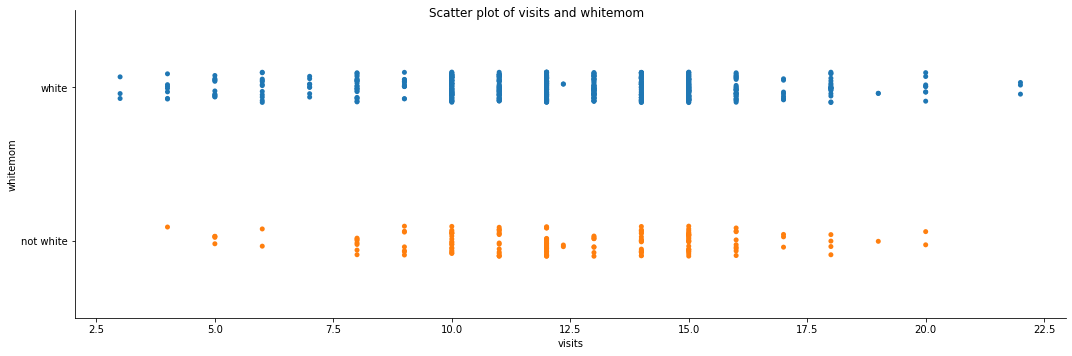

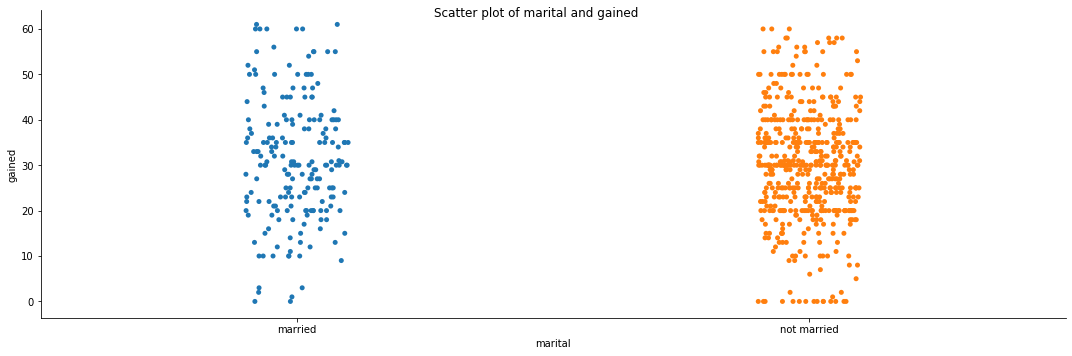

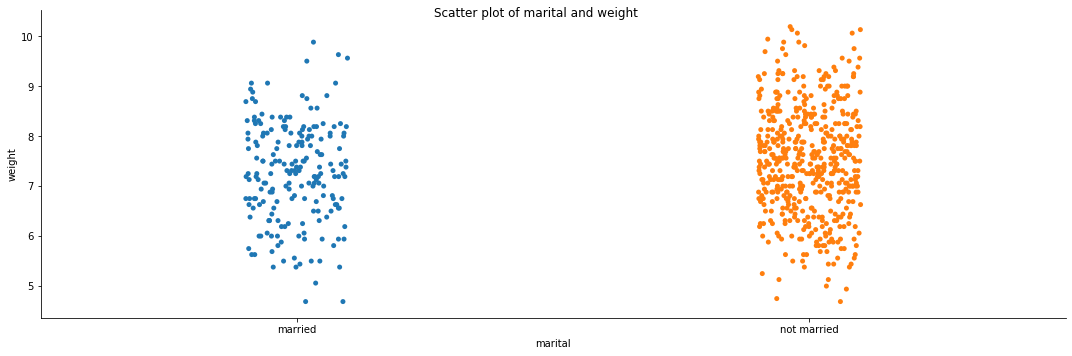

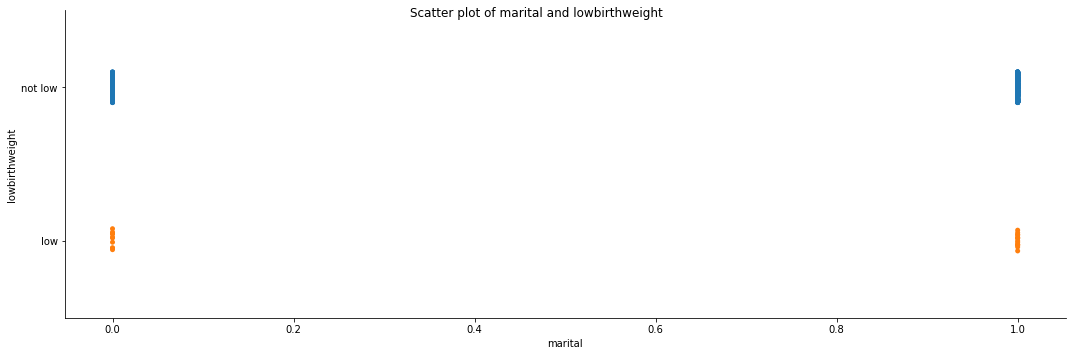

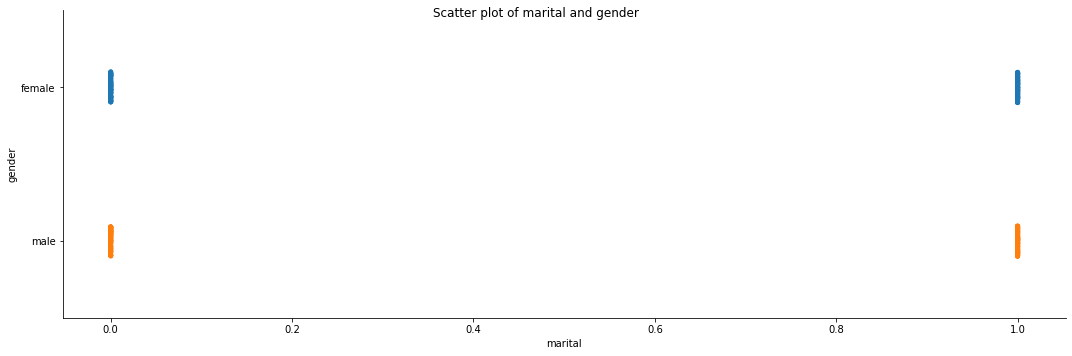

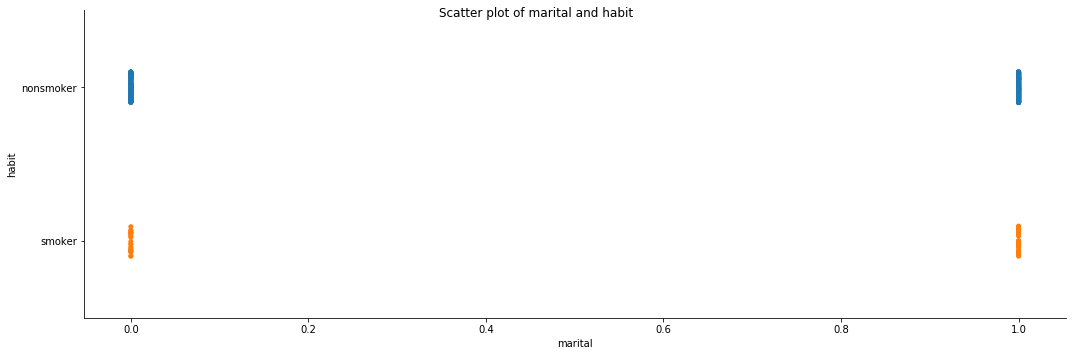

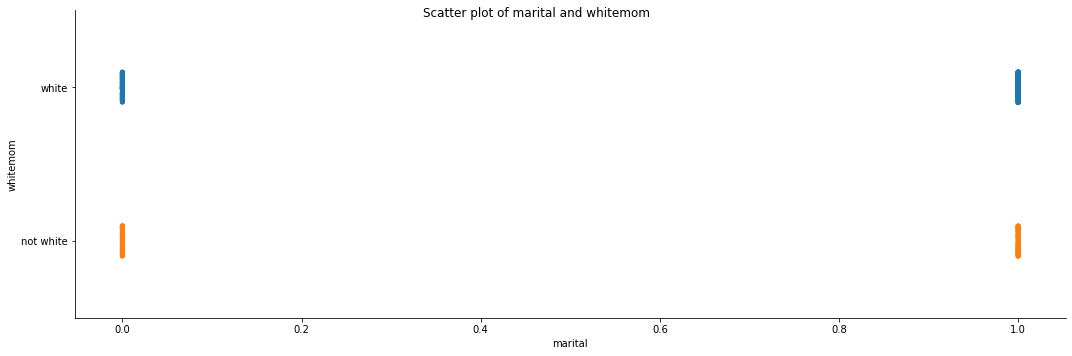

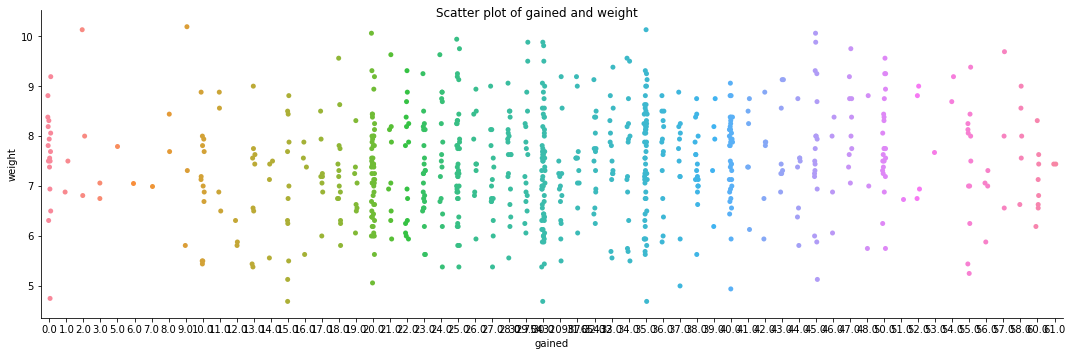

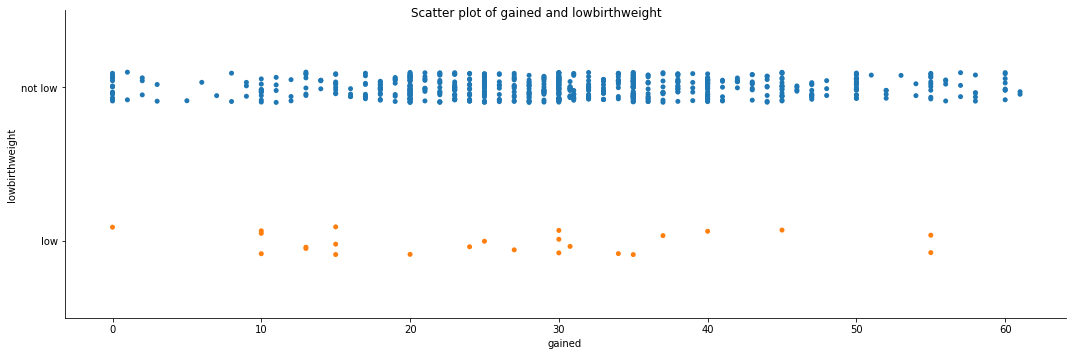

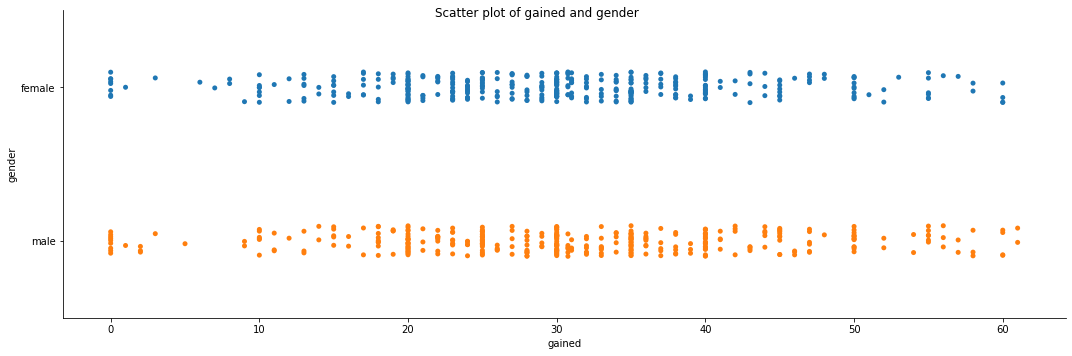

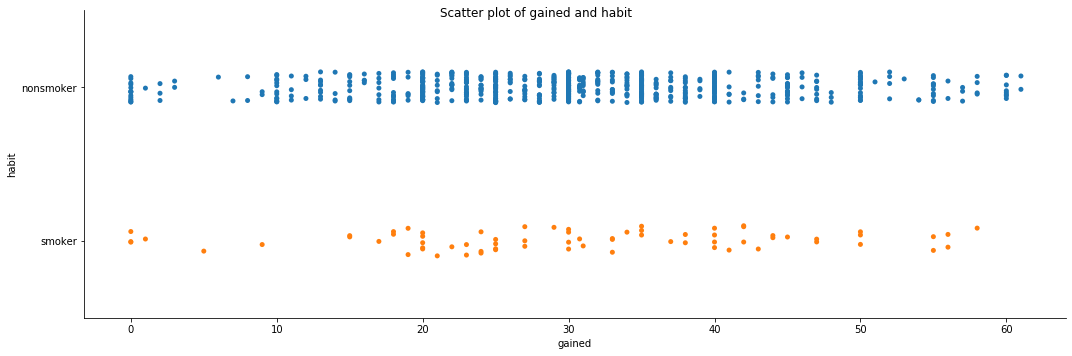

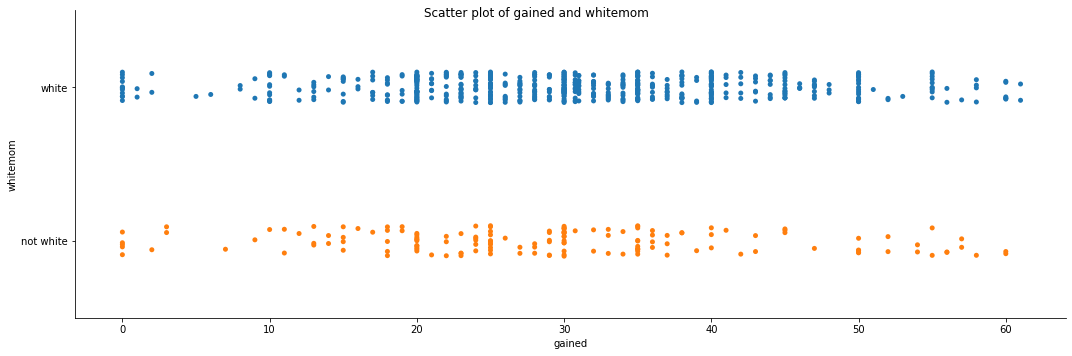

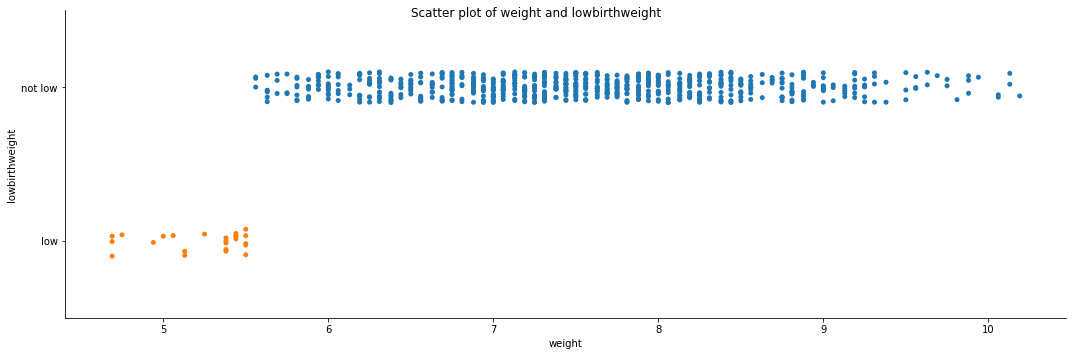

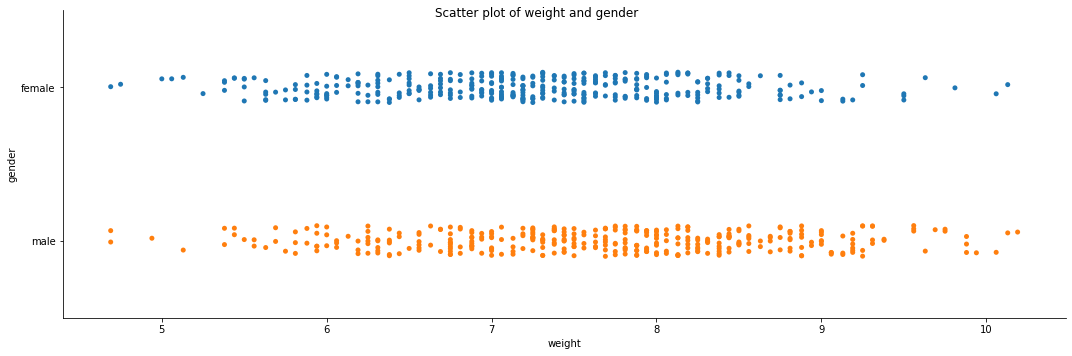

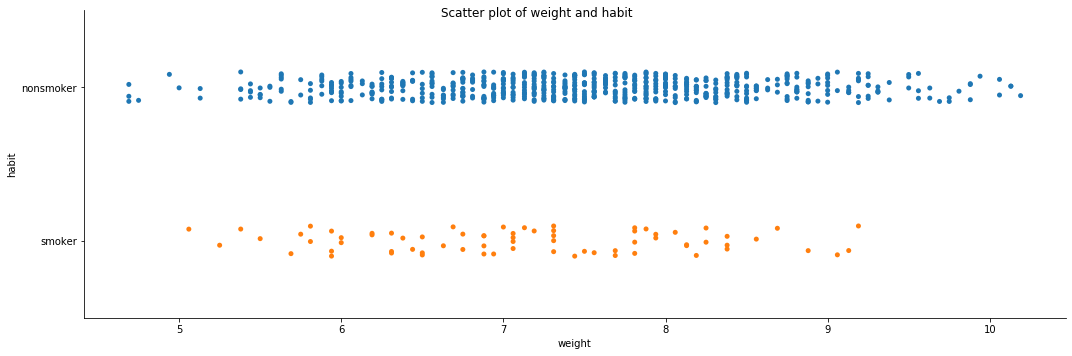

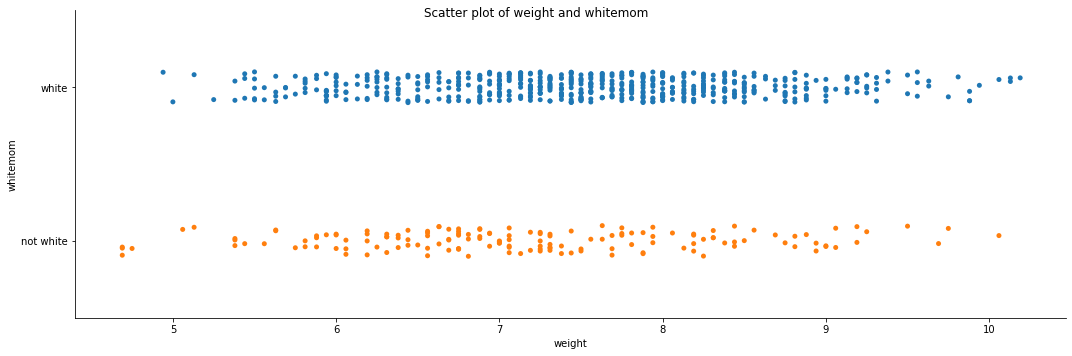

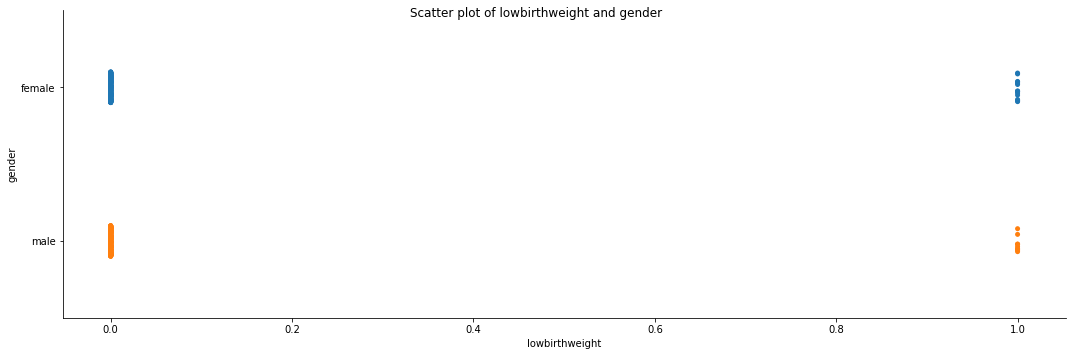

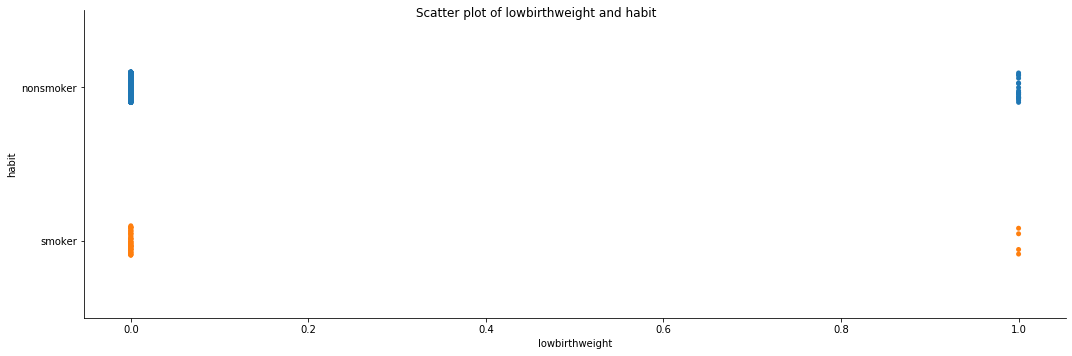

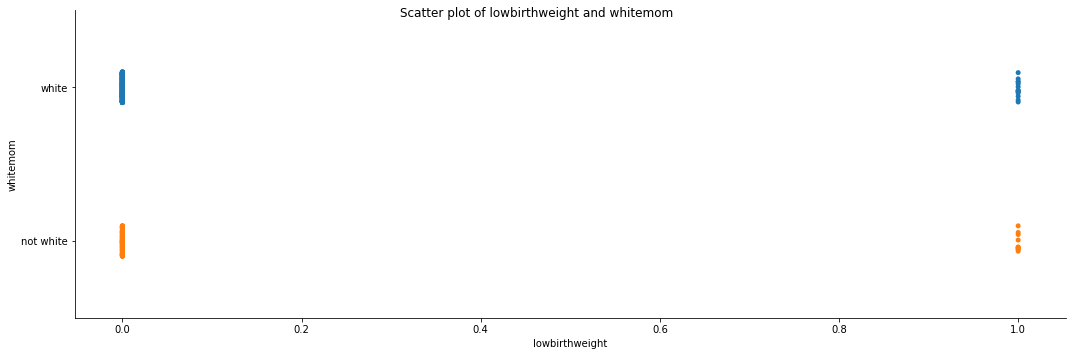

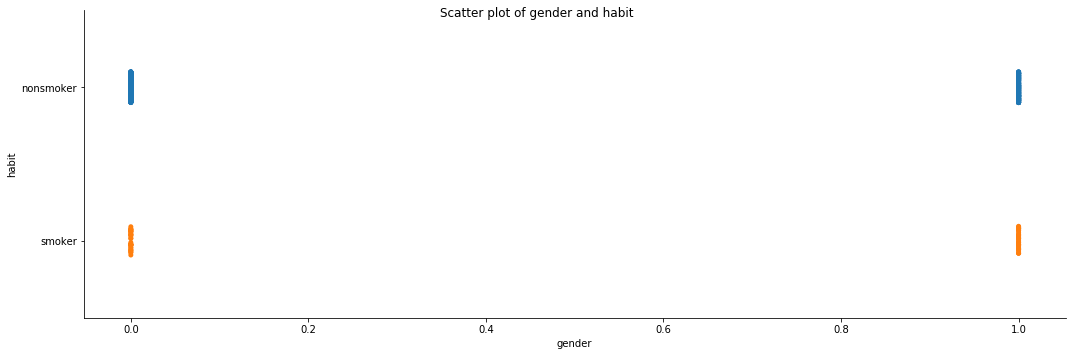

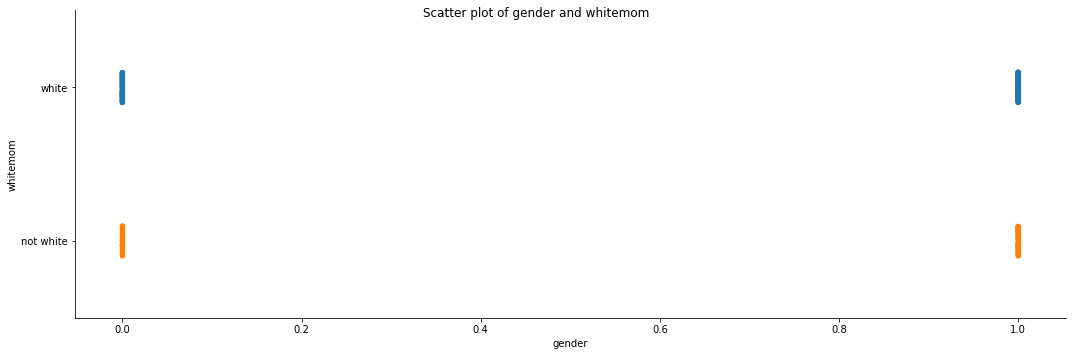

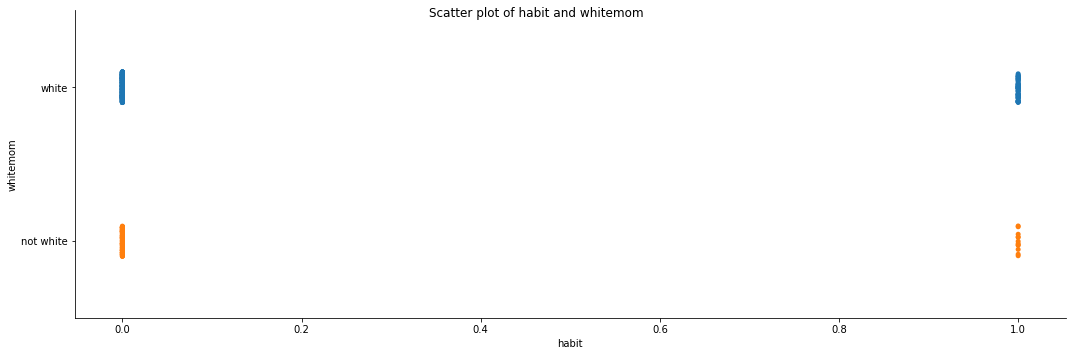

In [149]:
from itertools import combinations

numerical_col_names = df.select_dtypes(include=np.number)
cc = list(combinations(df.columns,2))

df_ = df.copy()
for pair in cc:
    if(pair[0] not in numerical_col_names and pair[1] not in numerical_col_names): # if both not numerical:
        df_[pair[0]] = pd.factorize(df[pair[0]])[0]
        plot = sns.catplot(x=pair[0], y=pair[1], data=df_, height=5,  aspect=3) # make the plot 5 units high & height should be three times width
    else:
        plot = sns.catplot(x=pair[0], y=pair[1], data=df, height=5,  aspect=3)
    plot.fig.suptitle("Scatter plot of " + pair[0] + " and " + pair[1])

#### Pair Scatter plots for every column combination

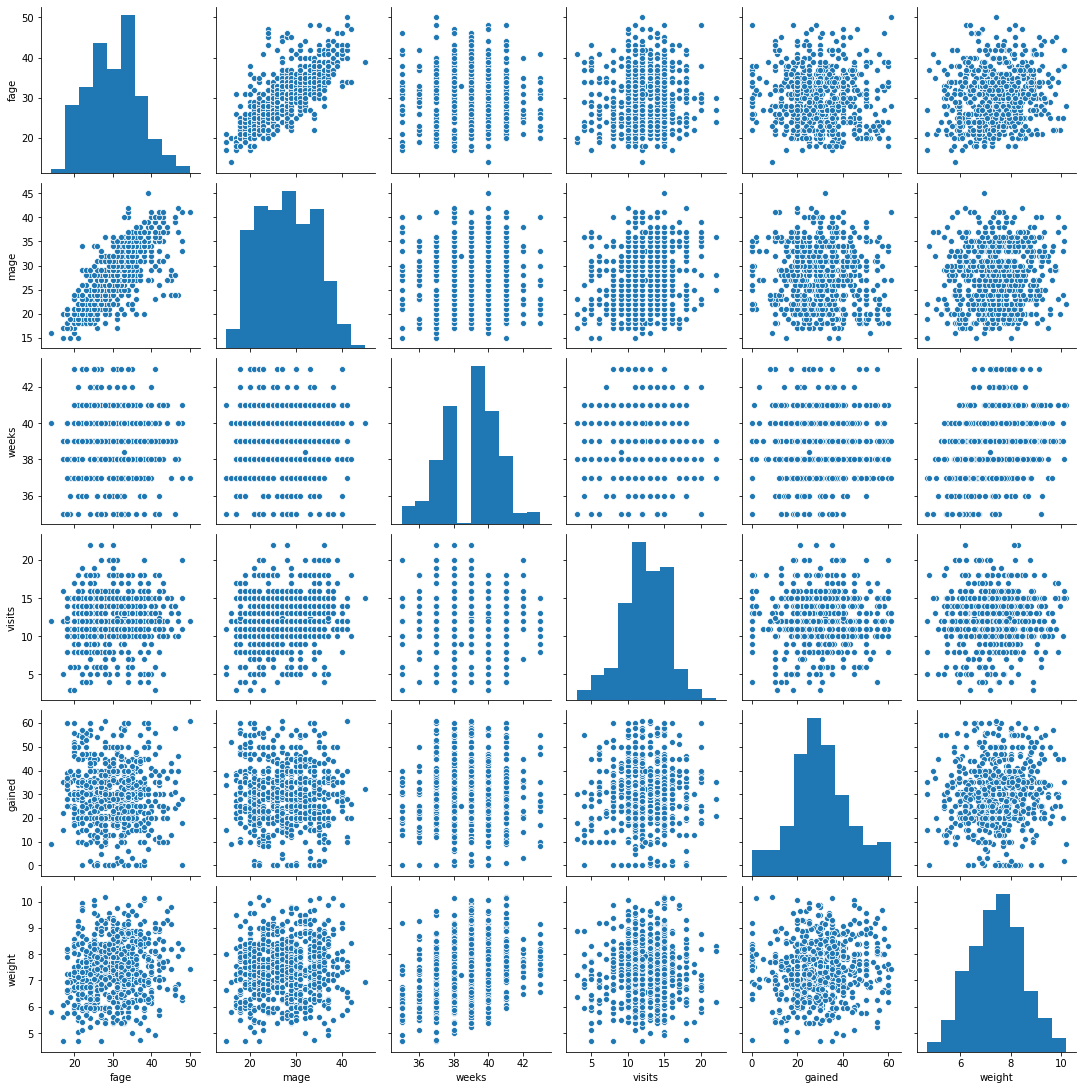

In [150]:
sns.pairplot(df)

### Q-Q Plots

In [151]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))

<Figure size 216x288 with 0 Axes>

<Figure size 216x288 with 0 Axes>

#### Q-Q Plots for Numerical Columns

Q-Q plots for fage


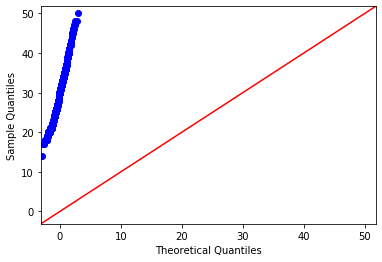

Q-Q plots for mage


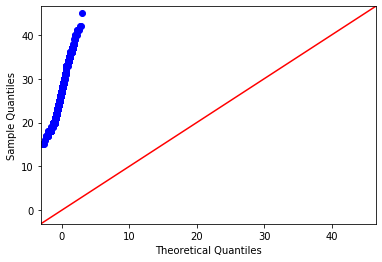

Q-Q plots for weeks


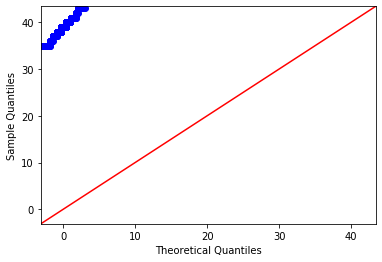

Q-Q plots for visits


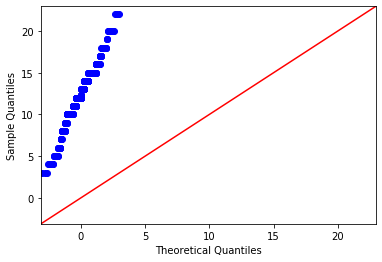

Q-Q plots for gained


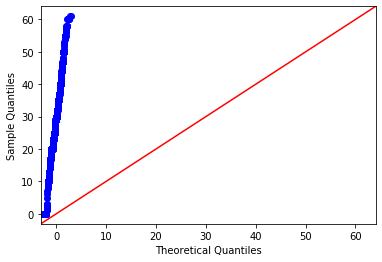

Q-Q plots for weight


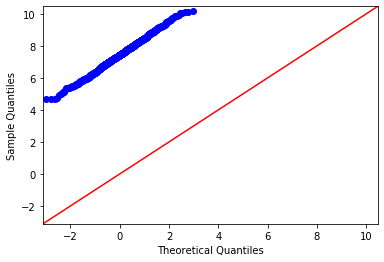

In [152]:
numerical_col_names = df.select_dtypes(include=np.number)

for col_name in numerical_col_names:
    print('Q-Q plots for', col_name)
    sm.qqplot(df[col_name], line ='45') 
    plt.show() 

### Categorical Column Relationships

In [153]:
white_smoking = len(df.loc[(df['whitemom'] == 'white') & (df['habit'] == 'smoker')])
white_no_smoking = len(df.loc[(df['whitemom'] == 'white') & (df['habit'] == 'nonsmoker')])
non_white_smoking = len(df.loc[(df['whitemom'] == 'not white') & (df['habit'] == 'smoker')])
non_white_no_smoking = len(df.loc[(df['whitemom'] == 'not white') & (df['habit'] == 'nonsmoker')])
print("Ethnicity and Habits correlation-----------------------------")
print("White and smoking", white_smoking)
print("White and not smoking", white_no_smoking)
print("Non-white and smoking", non_white_smoking)
print("Non-white and not smoking", non_white_no_smoking)

print("Percentage of white mother smoking:", white_smoking / (white_smoking + white_no_smoking))
print("Percentage of non-white mother smoking:", non_white_smoking / (non_white_smoking + non_white_no_smoking))

Ethnicity and Habits correlation-----------------------------
White and smoking 59
White and not smoking 505
Non-white and smoking 12
Non-white and not smoking 142
Percentage of white mother smoking: 0.10460992907801418
Percentage of non-white mother smoking: 0.07792207792207792


In [154]:
a = len(df.loc[(df['whitemom'] == 'white') & (df['gender'] == 'male')])
b = len(df.loc[(df['whitemom'] == 'white') & (df['gender'] == 'female')])
c = len(df.loc[(df['whitemom'] == 'not white') & (df['gender'] == 'male')])
d = len(df.loc[(df['whitemom'] == 'not white') & (df['gender'] == 'female')])
print("Ethnicity and Baby Gender correlation-----------------------------")
print("White and Male Baby", a)
print("White and Female Baby", b)
print("Non-white and Male Baby", c)
print("Non-white and Female Baby", d)

print("Percentage of white mother who has a male baby:", a / (a + b))
print("Percentage of white mother who has a female baby:", b / (a + b))
print("Percentage of non-white mother who has a male baby:",  c / (c + d))
print("Percentage of non-white mother who has a female baby:",  d / (c + d))

Ethnicity and Baby Gender correlation-----------------------------
White and Male Baby 272
White and Female Baby 292
Non-white and Male Baby 84
Non-white and Female Baby 70
Percentage of white mother who has a male baby: 0.48226950354609927
Percentage of white mother who has a female baby: 0.5177304964539007
Percentage of non-white mother who has a male baby: 0.5454545454545454
Percentage of non-white mother who has a female baby: 0.45454545454545453


In [155]:
a = len(df.loc[(df['whitemom'] == 'white') & (df['marital'] == 'married')])
b = len(df.loc[(df['whitemom'] == 'white') & (df['marital'] == 'not married')])
c = len(df.loc[(df['whitemom'] == 'not white') & (df['marital'] == 'married')])
d = len(df.loc[(df['whitemom'] == 'not white') & (df['marital'] == 'not married')])
print("Ethnicity and Marital Status correlation-----------------------------")
print("White and Married", a)
print("White and Not Married", b)
print("Non-white and Married", c)
print("Non-white and Not Married", d)

print("Percentage of white mother who is married:", a / (a + b))
print("Percentage of white mother who is not married:", b / (a + b))
print("Percentage of non-white mother who is married:",  c / (c + d))
print("Percentage of non-white mother who is not married:",  d / (c + d))

Ethnicity and Marital Status correlation-----------------------------
White and Married 126
White and Not Married 438
Non-white and Married 72
Non-white and Not Married 82
Percentage of white mother who is married: 0.22340425531914893
Percentage of white mother who is not married: 0.776595744680851
Percentage of non-white mother who is married: 0.4675324675324675
Percentage of non-white mother who is not married: 0.5324675324675324


## Feature Metrics

### 1. Feature Correlation (Correlation Matrix Heat Map)

###### Convert categorical values into numerical first

In [156]:
numerical_col_names = df.select_dtypes(include=np.number)
categorical_col_names = list(set(df.columns) - set(numerical_col_names))
print("Categorical columns to be converted:")
print(categorical_col_names)

_df = df.copy()
for col_name in categorical_col_names:
    _df[col_name] = pd.factorize(_df[col_name])[0]
    print(_df[col_name].sample(n=3, random_state=1))

Categorical columns to be converted:
['mature', 'whitemom', 'habit', 'lowbirthweight', 'marital', 'premie', 'gender']
101    0
108    0
337    0
Name: mature, dtype: int64
101    0
108    1
337    0
Name: whitemom, dtype: int64
101    1
108    0
337    0
Name: habit, dtype: int64
101    0
108    0
337    0
Name: lowbirthweight, dtype: int64
101    0
108    1
337    1
Name: marital, dtype: int64
101    0
108    1
337    1
Name: premie, dtype: int64
101    1
108    1
337    0
Name: gender, dtype: int64


###### Corelation Matrix Heatmap

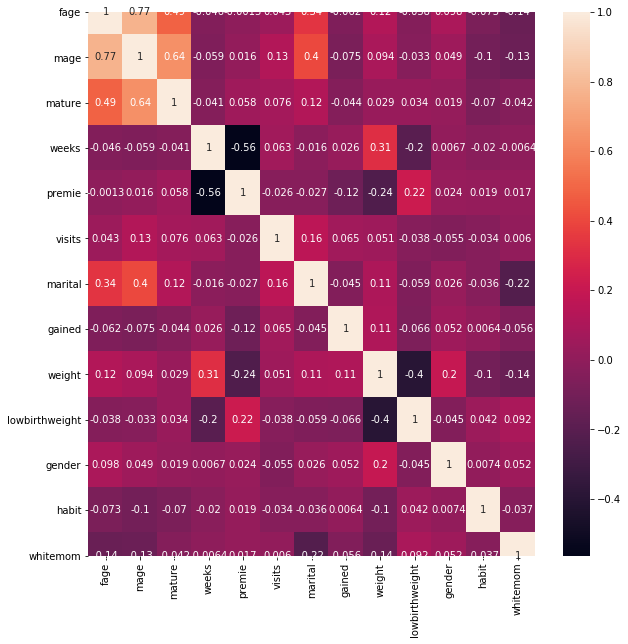

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10, 10))
sns.heatmap(_df.corr(), annot = True)
plt.show()

### 2. Distance Matrix

In [158]:
from scipy.spatial.distance import squareform, pdist
import seaborn as sns
import matplotlib.pyplot as plt

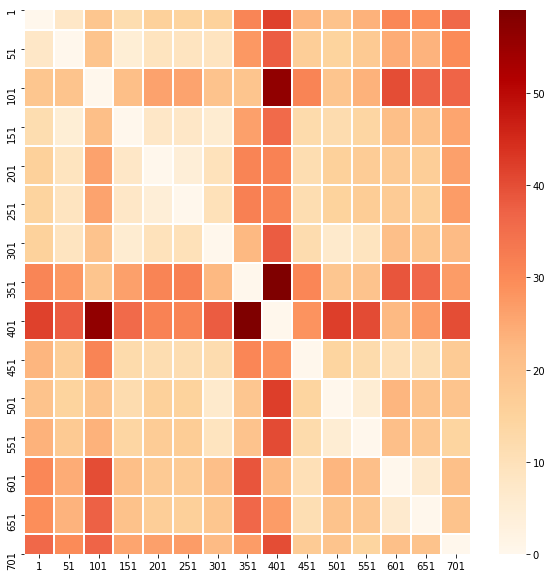

In [159]:
step = 50
object_nums = len(df) // step
indices = []
curr = 1
for i in range(object_nums+1):
    indices.append(curr)
    curr += 50


# make pairwise distance matrix
dist_mat = pd.DataFrame(
    squareform(pdist(_df.iloc[::50], metric='euclidean')),
    columns = indices,
    index = indices
)


plt.figure(figsize=(10,10))
# plot it with seaborn
sns.heatmap(
    dist_mat,
    cmap='OrRd',
    linewidth=1
)